In [1]:
import sys
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sys.path.extend(['//anaconda/lib/python2.7/site-packages', '//anaconda/lib/site-python'])

import re
import requests
import nltk
from nltk.corpus import stopwords


from bs4 import BeautifulSoup
from tswift import Song
from tswift import Artist
import billboard
import os
import glob
import numpy as np
import pandas as pd


def get_stopwords():
	with open('stopwords.txt', 'rb') as f:
		words = f.read().splitlines()
	return set(words)

def remove_stopwords(lyrics):
    f_lyrics = lyrics[:]
    swords = get_stopwords()
    for word in lyrics:
        if word in get_stopwords():
            f_lyrics.replace(word, '')
    return (f_lyrics)
            

def remove_nonalphanum(text):
    # Names should contain only lowercase alphanumeric characters and spaces.
    text = text.replace('-', ' ').lower()
    text = (re.sub(r'[^\w\- ]+', '', text))
#    text = text.replace(' ', '-')
    return text

def unique_words(lyrics):
#	words = lyrics.replace("'",'').replace('"','').replace('?','').replace('!','').replace('(').replace(')').replace('.','').replace(',','').replace('-','').split(' ')
	words = remove_nonalphanum(lyrics)
	return (words)

def filter_by_artists(artist):
    return df_lyric.loc[df_lyric['Artist'] == artist]

def filter_by_year(year):
    if len(year) == 4:
        return df_lyric.loc[df_lyric['ChartYear'] == year]
    else:
        return "invalid year"

def words_by_artist(artist):
    return remove_nonalphanum(' '.join(df_lyric.loc[df_lyric['Artist'] == artist,'lyric']))

def words_by_year(year):
    return remove_nonalphanum(' '.join(df_lyric.loc[df_lyric['ChartYear'] == year,'lyric']))

def funwords():
    w = ['love', 'money', 'body', 'foul', 'hate', 'sex', 'sexy', 'kill', 'boys', 'girls', 'men', 'women', 'smile', 'home', 'kiss', 'happy', 'baby', 'heart', 'lonely', 'sad']
    return w

//anaconda/envs/py27/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [2]:
lyric_list = []
set(os.listdir('lyrics/')) & set(os.listdir('track-data/')) #re run part of code that builds track name to build year.artist.track

# print len(set(os.listdir('lyrics/')) & set(os.listdir('track-data/')))
for key in (set(os.listdir('lyrics/')) & set(os.listdir('track-data/'))):
	lyric_dict = {}
	lyric_dict['file'] = key
	if key.find('.txt') > 0:
		with open(os.path.join('lyrics/', key)) as lyric_f:
			lyric_dict['lyric'] = ' '.join(lyric_f.readlines())
	
		with open(os.path.join('track-data/', key)) as track_f:
			ChartYear, Artist, Title, _ = track_f.readline().split('|', 3)
			lyric_dict['ChartYear'] = ChartYear
			lyric_dict['Artist'] = Artist
			lyric_dict['Title'] = Title
	
		lyric_list.append(lyric_dict)
#print lyric_dict	
df_lyric = pd.DataFrame(lyric_list)

In [3]:
taylor = words_by_artist('taylor-swift')

In [3]:
import sys
import codecs
import nltk
from nltk.corpus import stopwords
from collections import Counter
default_stopwords = set(nltk.corpus.stopwords.words('english'))

stopwords_file = './stopwords.txt'
custom_stopwords = set(codecs.open(stopwords_file, 'r', 'utf-8').read().splitlines())

all_stopwords = default_stopwords | custom_stopwords

def get_wordfreq_df(year):

    wordbag = words_by_year(year).decode('utf-8')#vocab.decode('utf-8')#words_by_year(year)
    words = nltk.word_tokenize(wordbag)
    words = [word for word in words if len(word) > 2]
    words = [word for word in words if not word.isdigit()]
    words = [word.lower() for word in words]
    words = [word for word in words if word not in all_stopwords]

    fdist = nltk.FreqDist(words)
    #for word, frequency in fdist.most_common(50):
        #print word, frequency
    d = Counter(fdist)
    word_df = pd.DataFrame.from_dict(d, orient='index').reset_index()
    word_df = word_df.rename(columns={'index':'Word',0:'count'})

    df = pd.DataFrame(fdist.most_common(25))
    df.columns = ['Words', 'Count']
    df.sort_index(ascending=False).plot(
        kind='barh',
        x = 'Words',
        title = "Most Common Lyrics in: " + year,
    )
    return word_df.sort_index(ascending=False)

In [4]:
import sys
import codecs
import nltk
from nltk.corpus import stopwords
from collections import Counter
default_stopwords = set(nltk.corpus.stopwords.words('english'))

stopwords_file = './stopwords.txt'
custom_stopwords = set(codecs.open(stopwords_file, 'r', 'utf-8').read().splitlines())

all_stopwords = default_stopwords | custom_stopwords

#def get_wordfreq_df(year):

wordbag = vocab.decode('utf-8')#words_by_year(year)

words = nltk.word_tokenize(wordbag)
#for word in words:
#    print word
words = [word for word in words if len(word) > 2]
words = [word for word in words if not word.isdigit()]
words = [word.lower() for word in words]
words = [word for word in words if word not in all_stopwords]

fdist = nltk.FreqDist(words)
#for word, frequency in fdist.most_common(50):
    #print word, frequency
d = Counter(fdist)
word_df = pd.DataFrame.from_dict(d, orient='index').reset_index()
word_df = word_df.rename(columns={'index':'Word',0:'count'})

df = pd.DataFrame(fdist.most_common(25))
df.columns = ['Words', 'Count']
df.sort_index(ascending=False).plot(
    kind='barh',
    x = 'Words',
    title = "Most Common Lyrics in: ",
)
#    return word_df.sort_index(ascending=False)

NameError: name 'vocab' is not defined

In [13]:
from os import path
from wordcloud import WordCloud


def get_wordcloud_year(year):
    wordbag = words_by_year(year)

    words = remove_nonalphanum(wordbag)
    print 0, len(words)

    words = words.split()
    # Remove single-character & 2-character tokens (mostly punctuation)
    words = [word for word in words if len(word) > 2]
    print 1, len(words)

    # Remove numbers
    words = [word for word in words if not word.isdigit()]
    print 2, len(words)

    # Lowercase all words (default_stopwords are lowercase too)
    words = [word.lower() for word in words]
    print 3, len(words)

    #remove stopwords
    words = [word for word in words if word not in all_stopwords]
    print 4, len(words)

    #wordcloud = WordCloud().generate(words)

    # Display the generated image:
    # the matplotlib way:
    import matplotlib.pyplot as plt
   # plt.imshow(wordcloud)
    plt.axis("off")

    # lower max_font_size
    #wordcloud = WordCloud(max_font_size=50).generate()   (str(words))
    plt.figure()
    #plt.imshow(wordcloud)
    plt.axis("off")
    #plt.show()
    print(len(words))


    wordcloud = WordCloud(width = 1000, height = 750, font_path='/Library/Fonts/Verdana.ttf',
                      relative_scaling = 1.0,
                      stopwords = all_stopwords,
                      ).generate(' '.join(words))
    plt.figure(figsize=(20,12))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

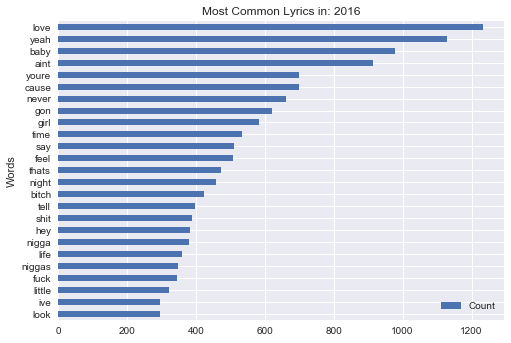

In [9]:
l = get_wordfreq_df('2016')

0 385444
1 60478
2 60458
3 60458
4 28381
28381


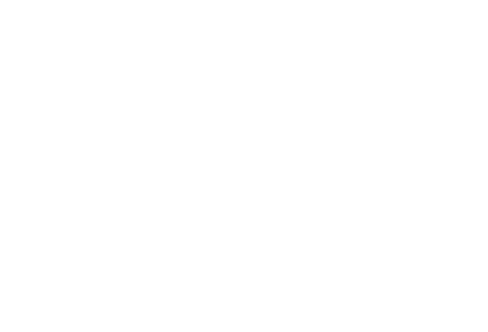

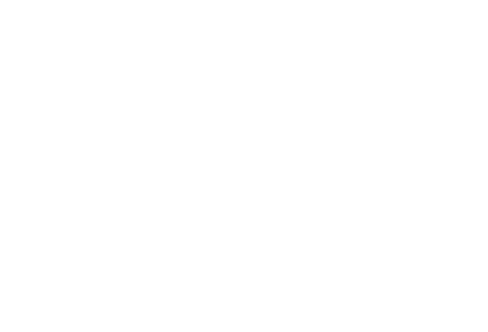

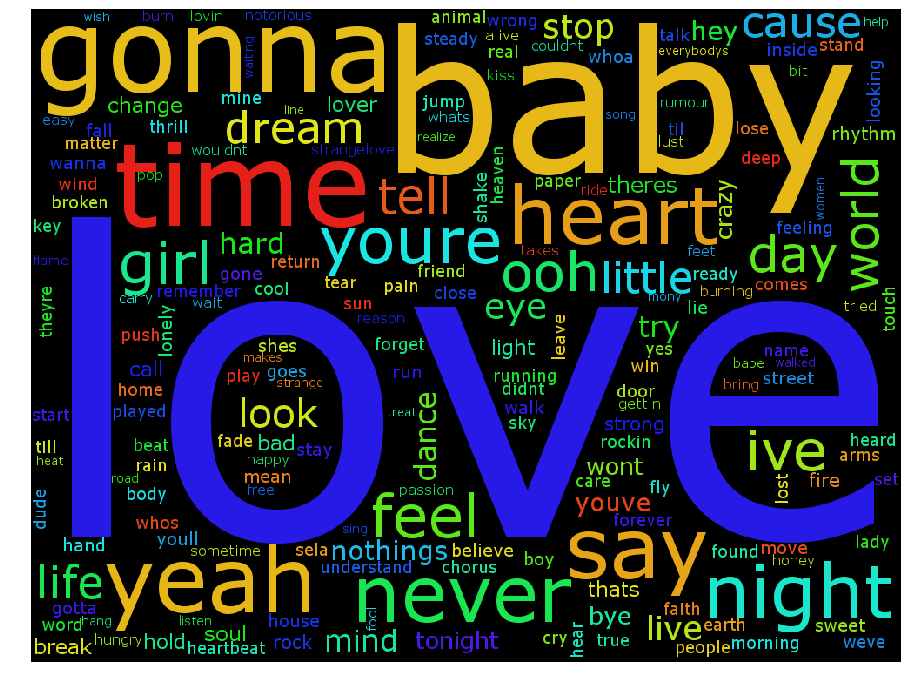

0 649661
1 102014
2 101999
3 101999
4 46540
46540


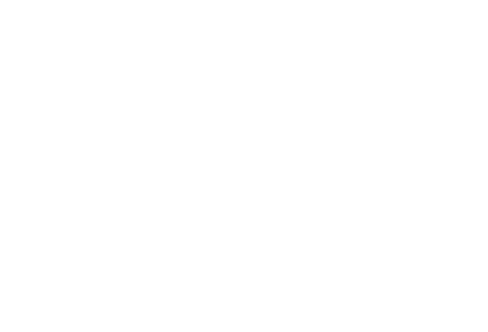

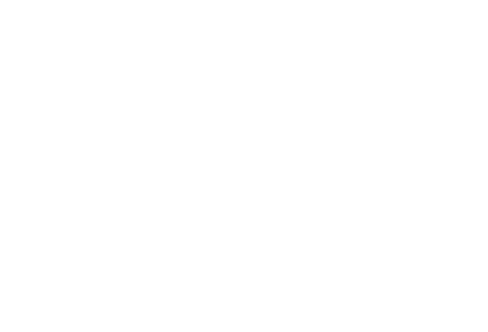

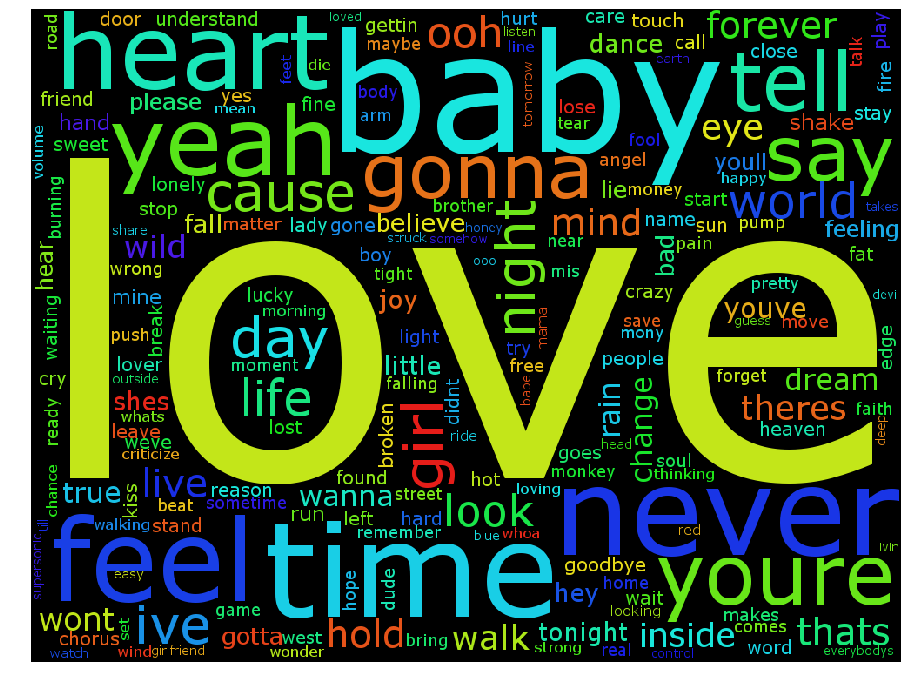

0 668627
1 104958
2 104952
3 104952
4 47798
47798


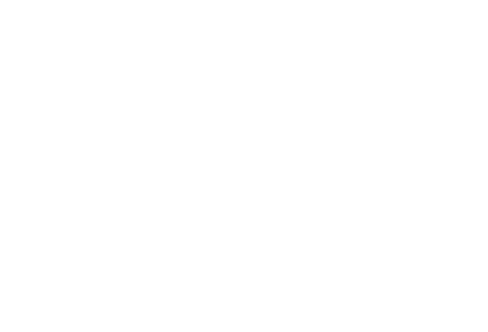

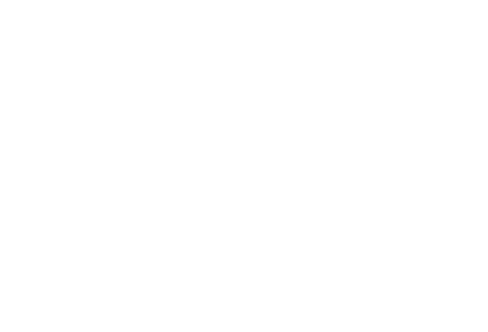

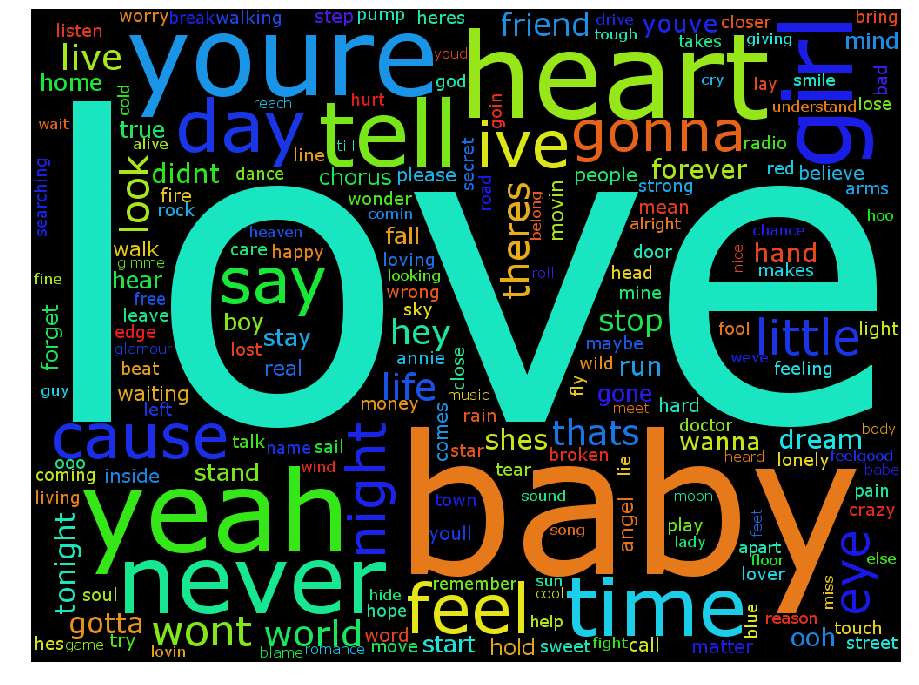

0 641487
1 101096
2 101088
3 101088
4 47043
47043


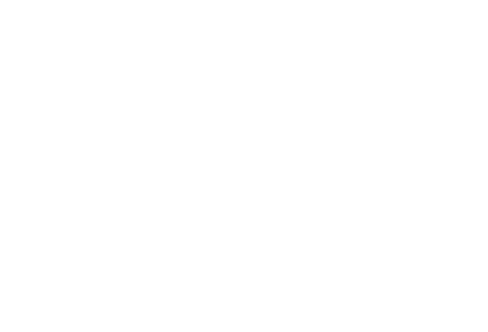

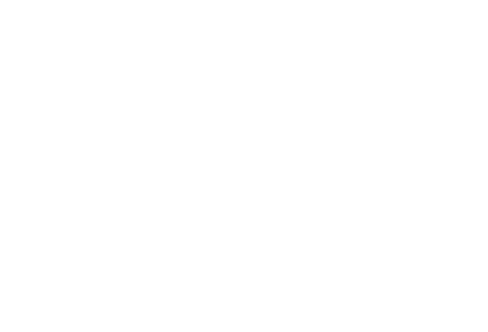

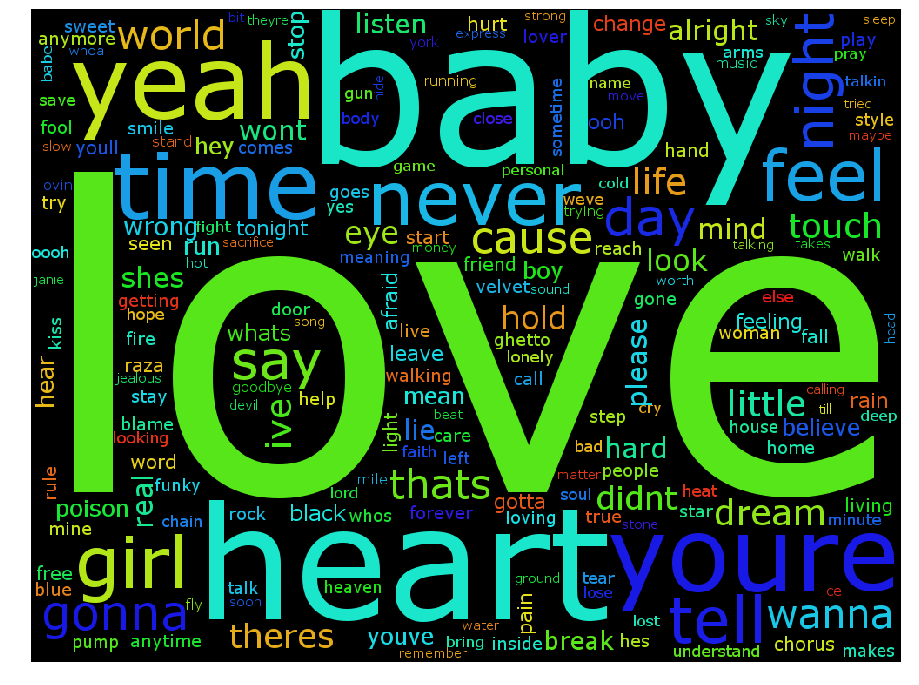

0 670271
1 106195
2 106191
3 106191
4 48373
48373


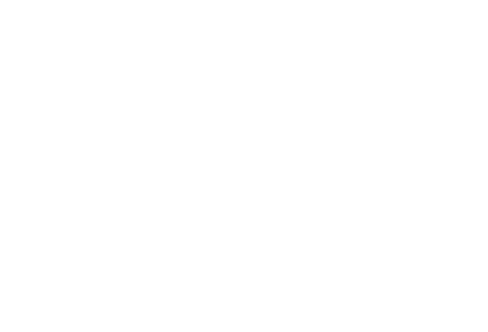

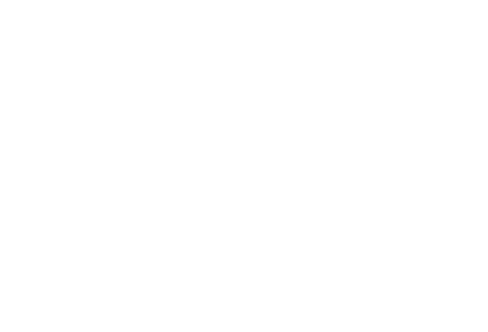

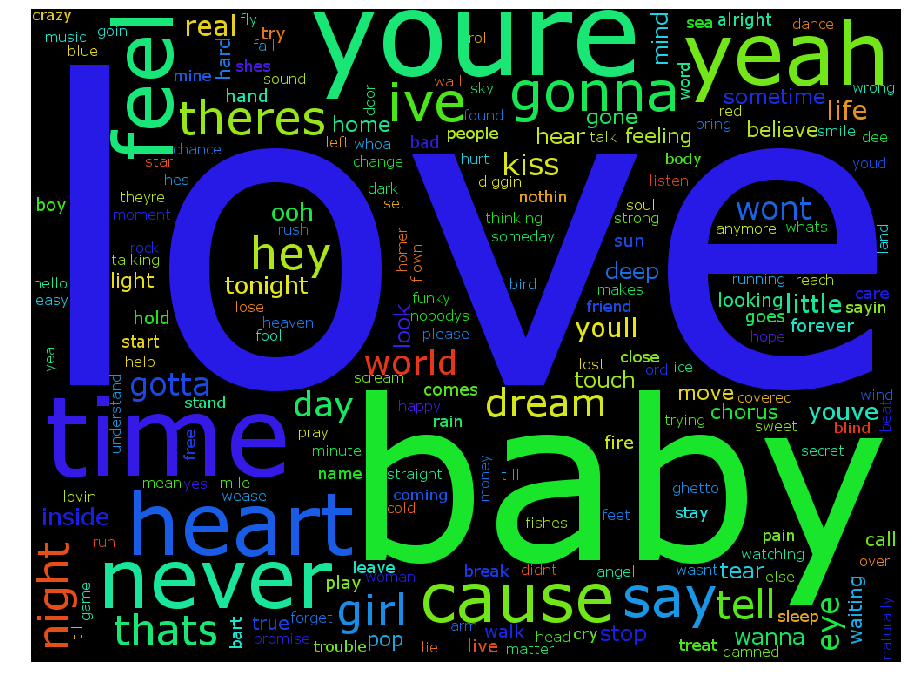

0 681590
1 108154
2 108143
3 108143
4 49708
49708


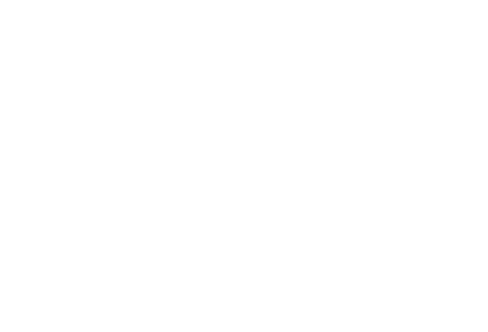

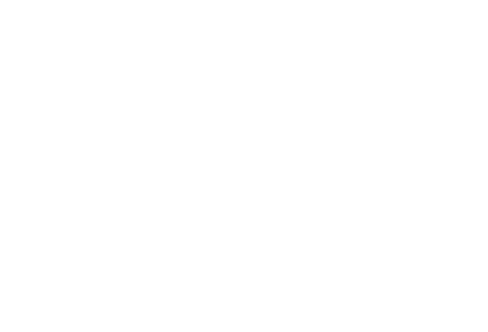

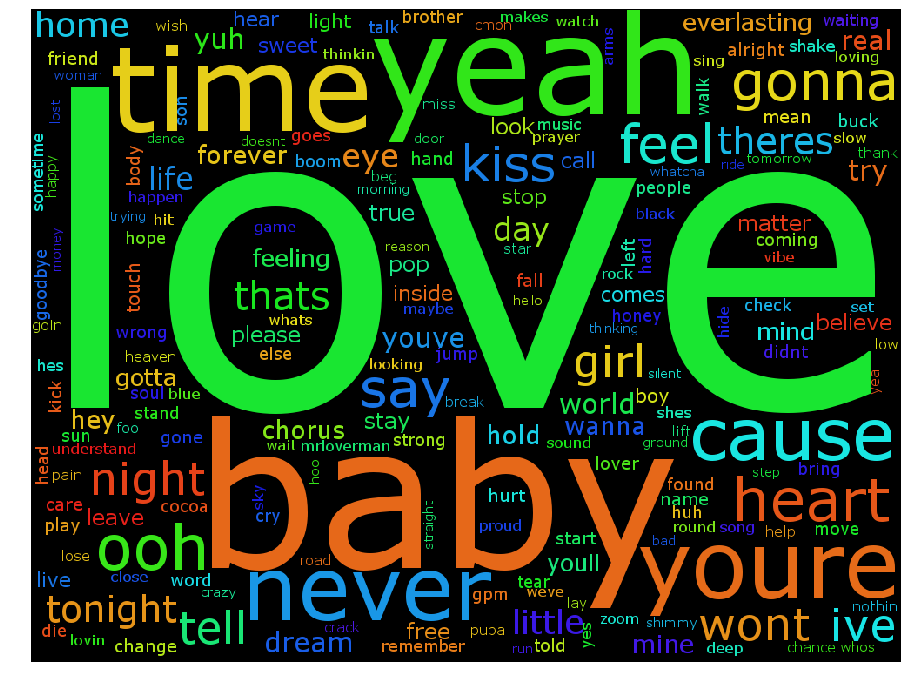

0 715395
1 112472
2 112449
3 112449
4 54098
54098


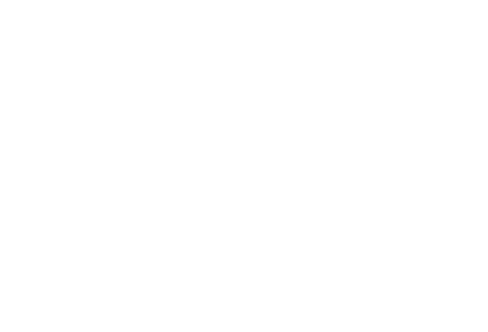

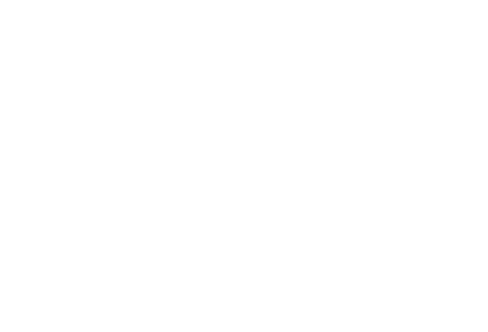

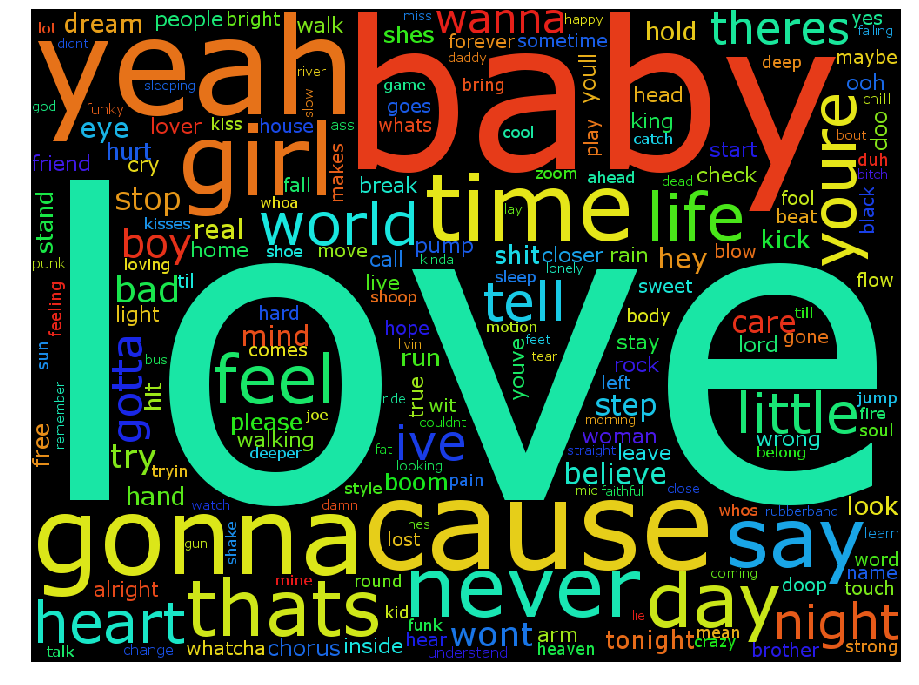

0 696427
1 109647
2 109618
3 109618
4 51481
51481


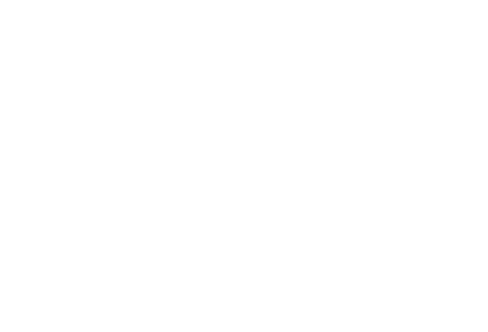

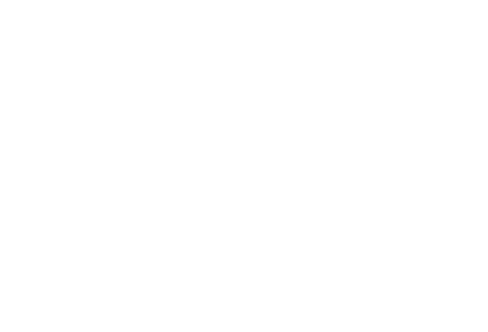

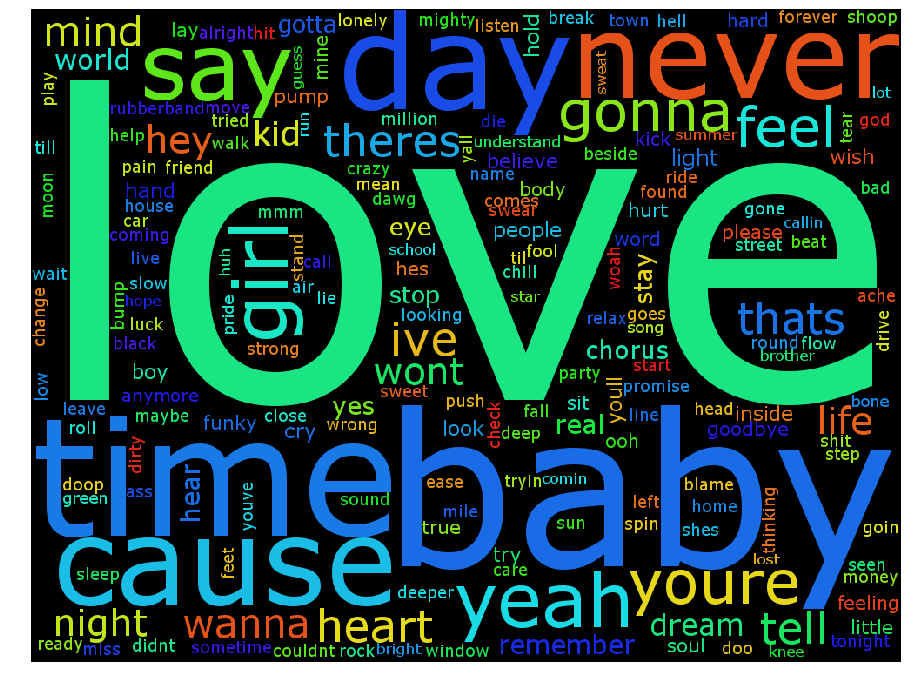

0 646554
1 101881
2 101859
3 101859
4 48050
48050


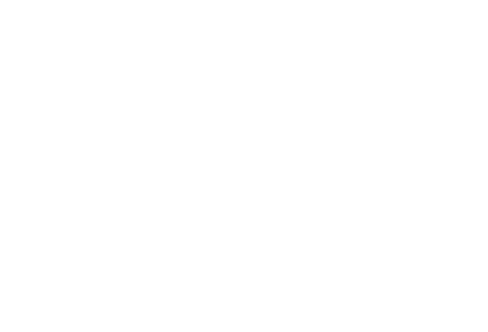

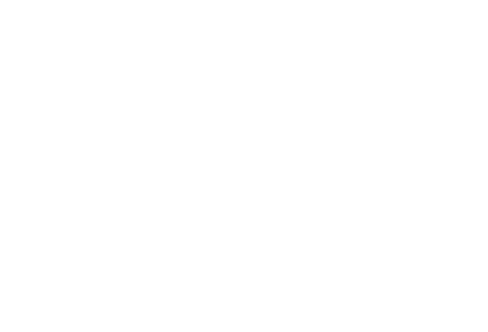

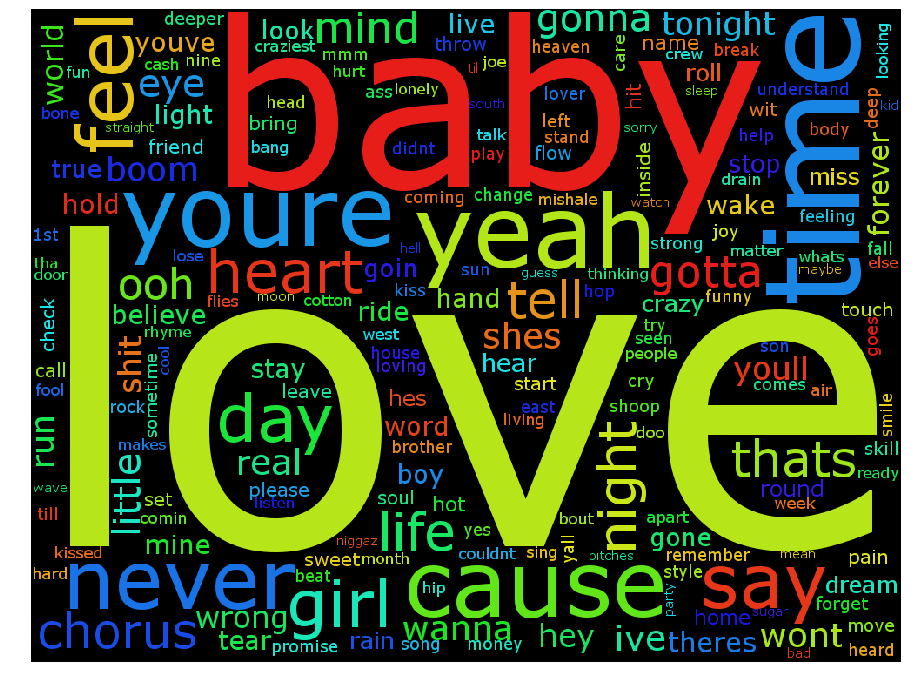

0 648900
1 101809
2 101773
3 101773
4 48010
48010


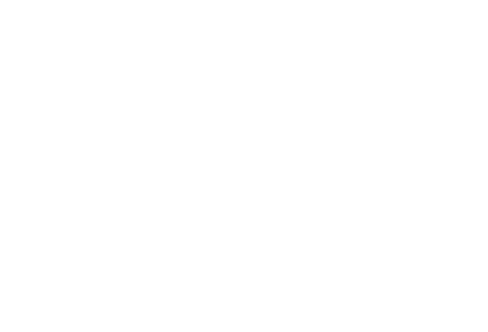

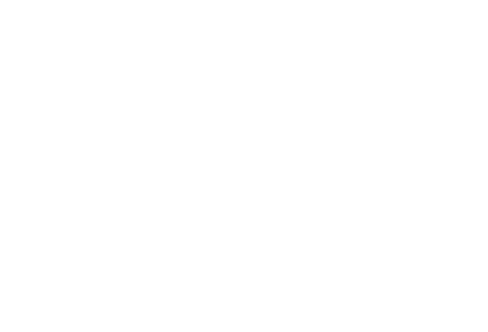

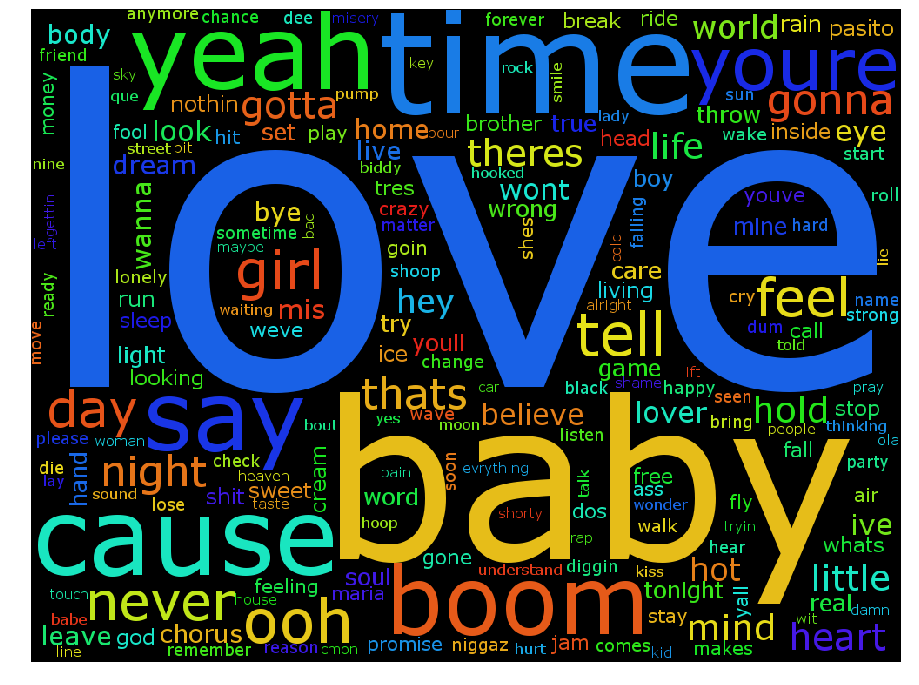

0 650684
1 101498
2 101479
3 101479
4 47351
47351


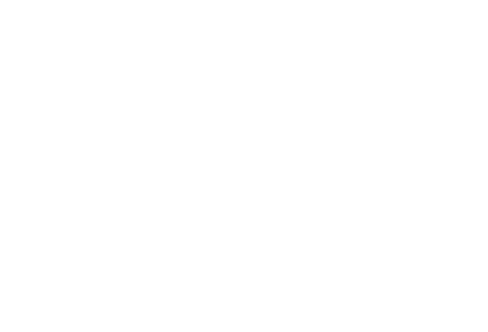

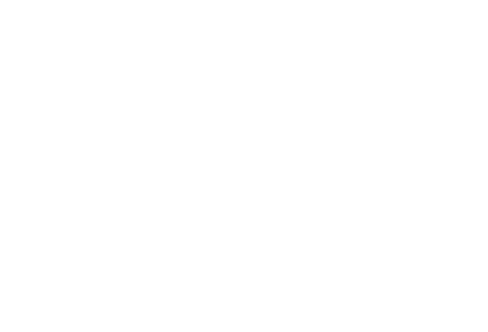

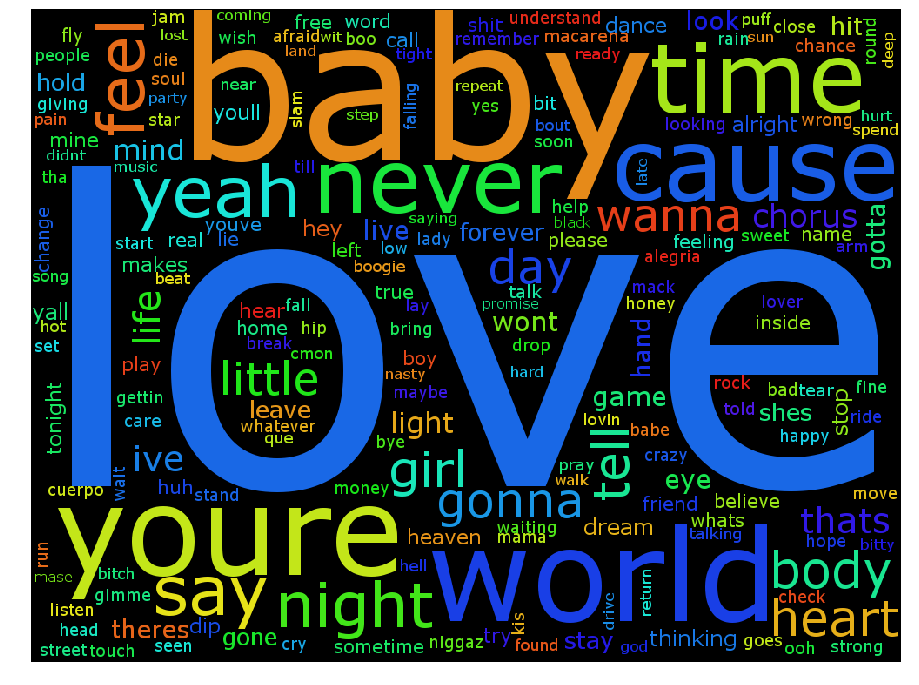

0 758253
1 118568
2 118541
3 118541
4 53861
53861


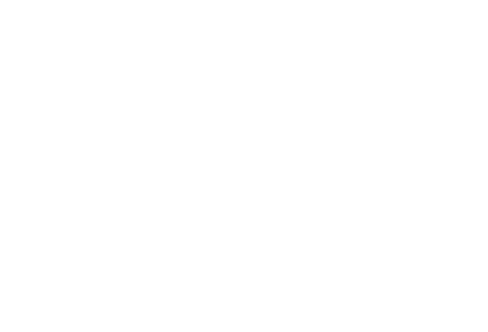

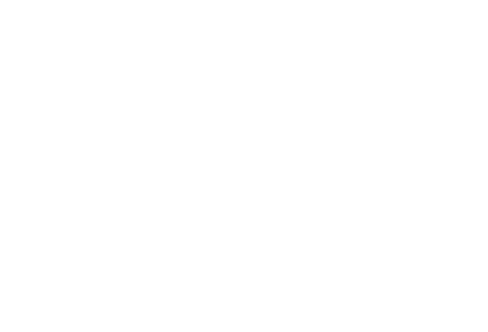

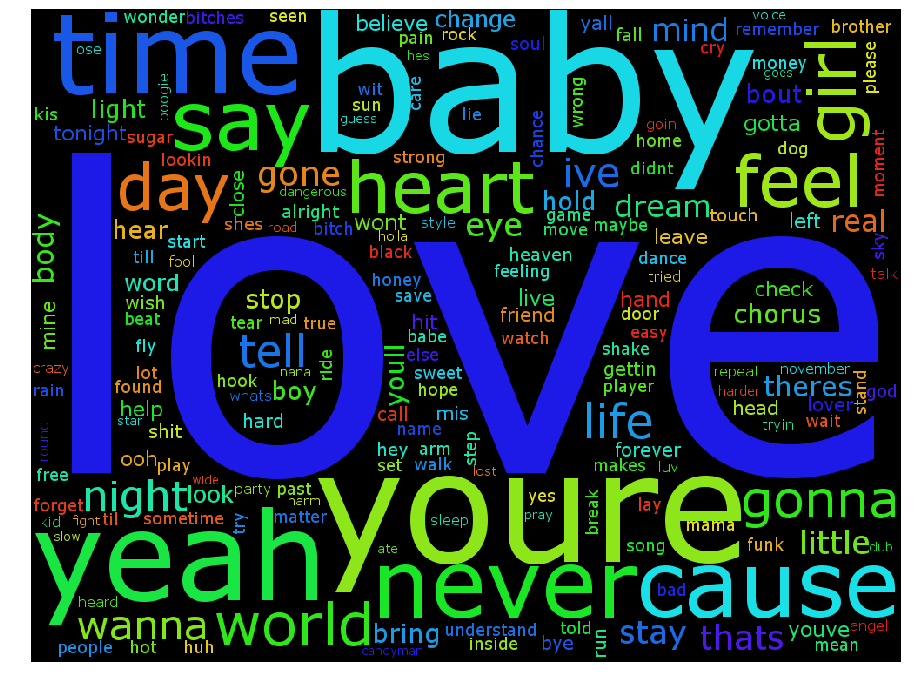

0 709098
1 112002
2 111955
3 111955
4 51108
51108


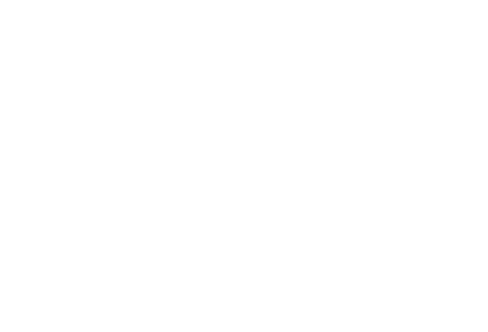

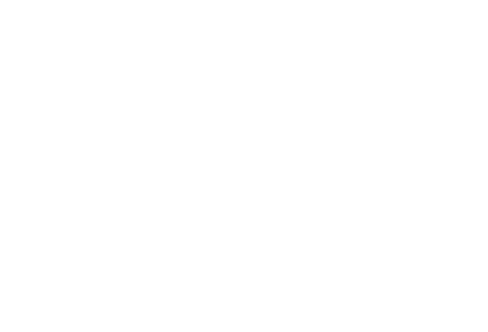

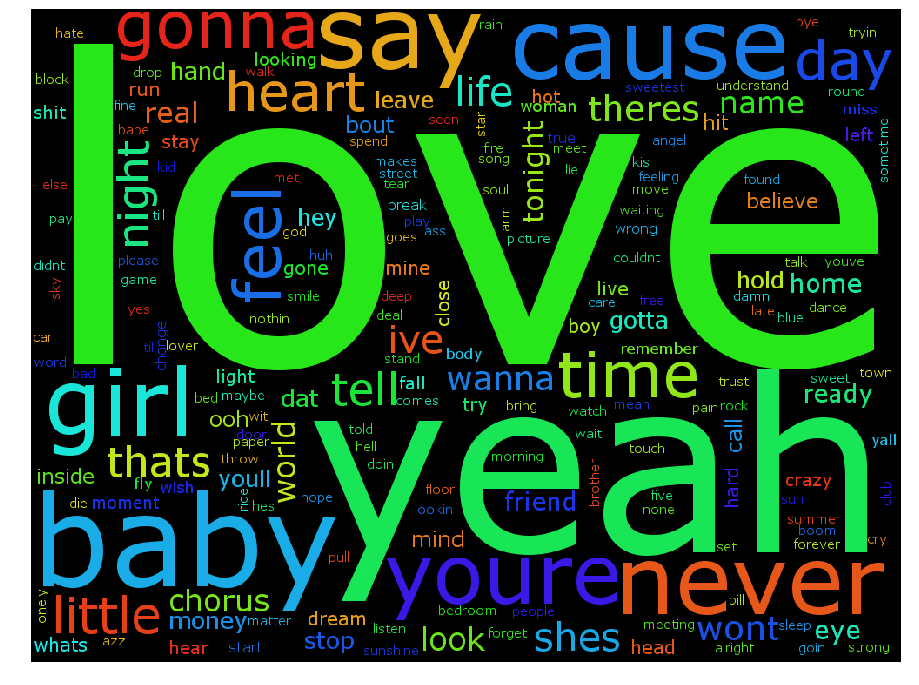

0 773171
1 122912
2 122890
3 122890
4 54891
54891


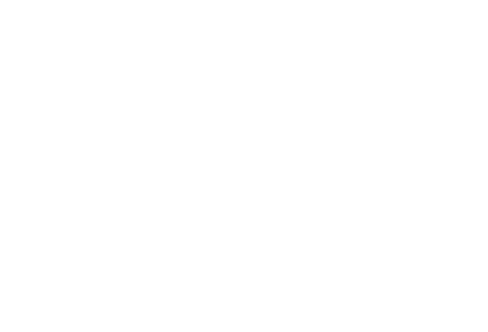

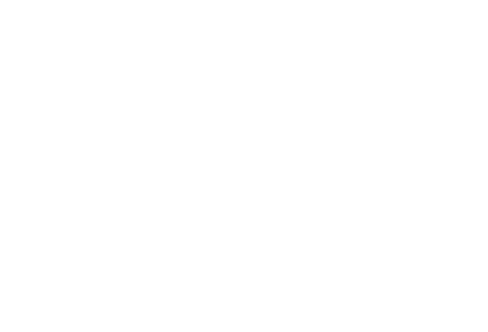

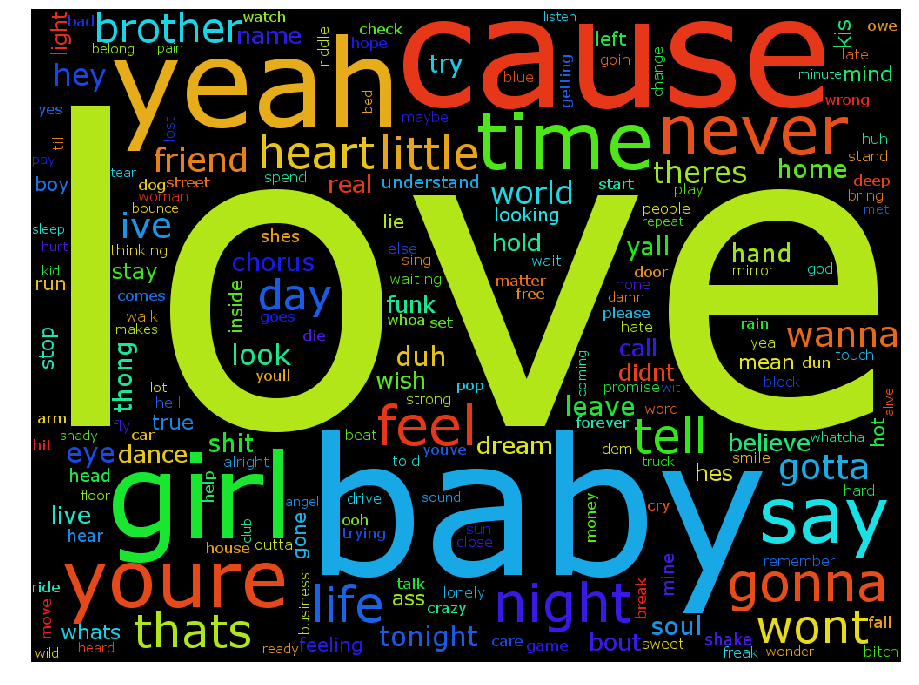

0 435949
1 68590
2 68578
3 68578
4 30828
30828


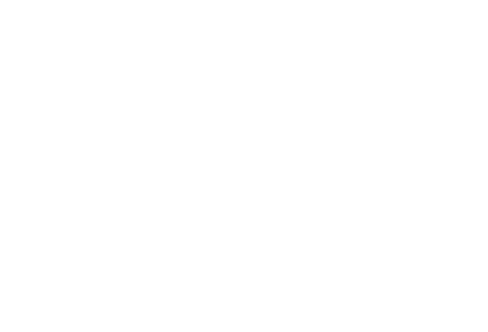

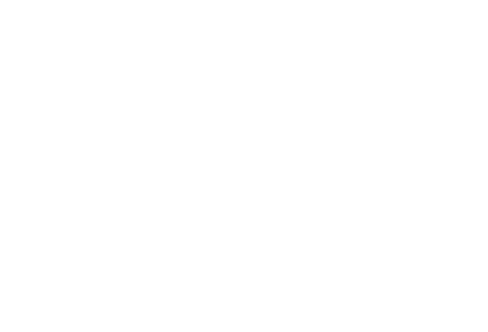

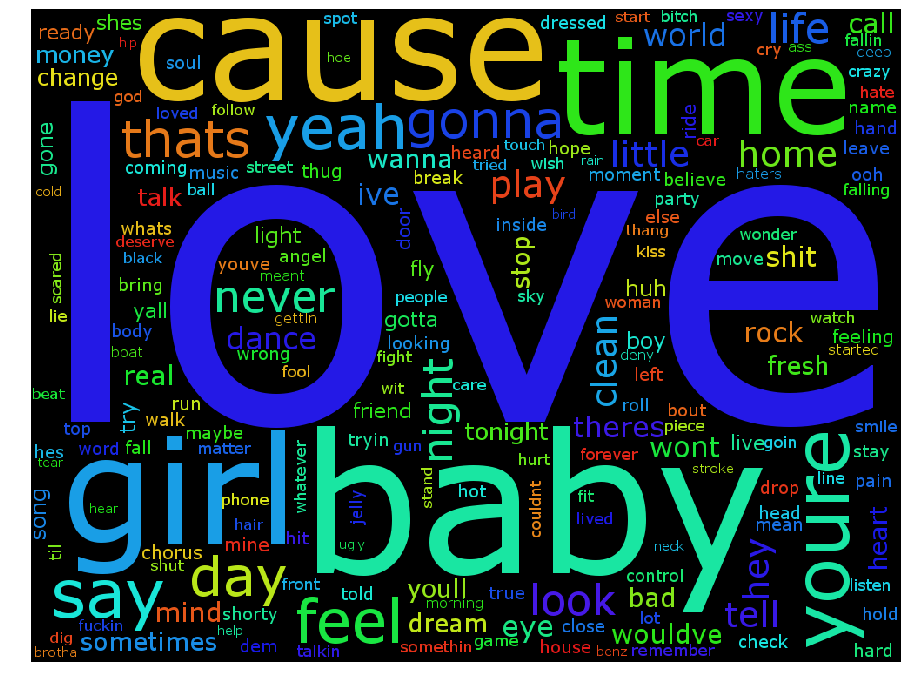

0 716663
1 112822
2 112804
3 112804
4 51060
51060


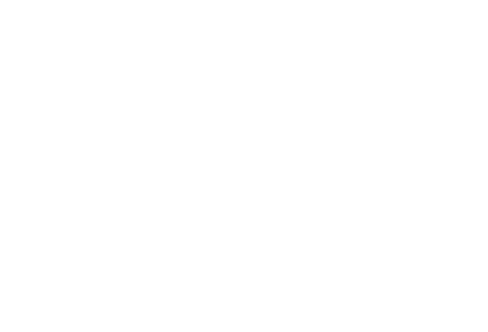

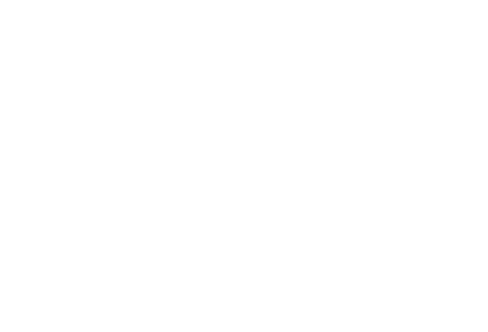

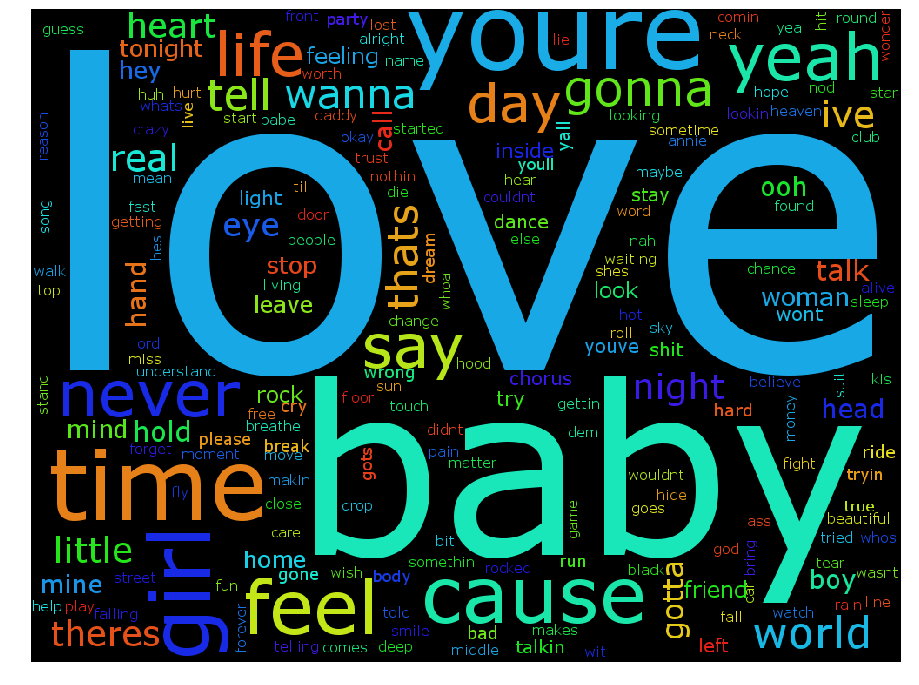

0 784659
1 123851
2 123820
3 123820
4 57598
57598


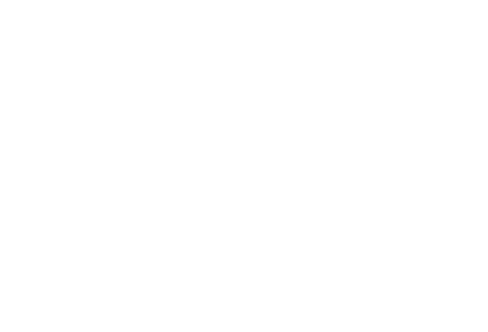

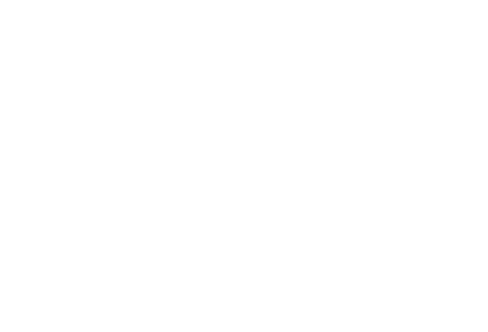

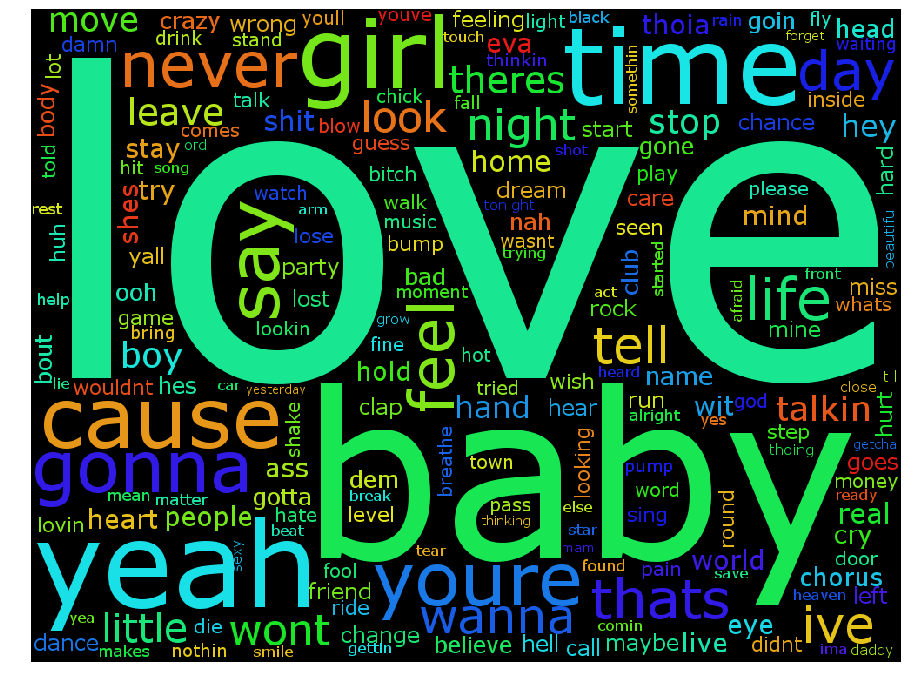

0 763794
1 120767
2 120707
3 120707
4 57302
57302


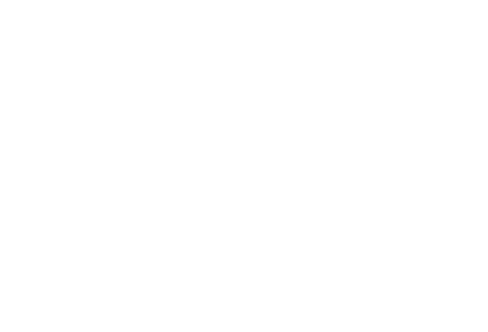

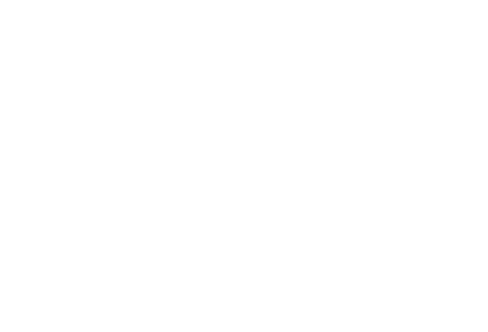

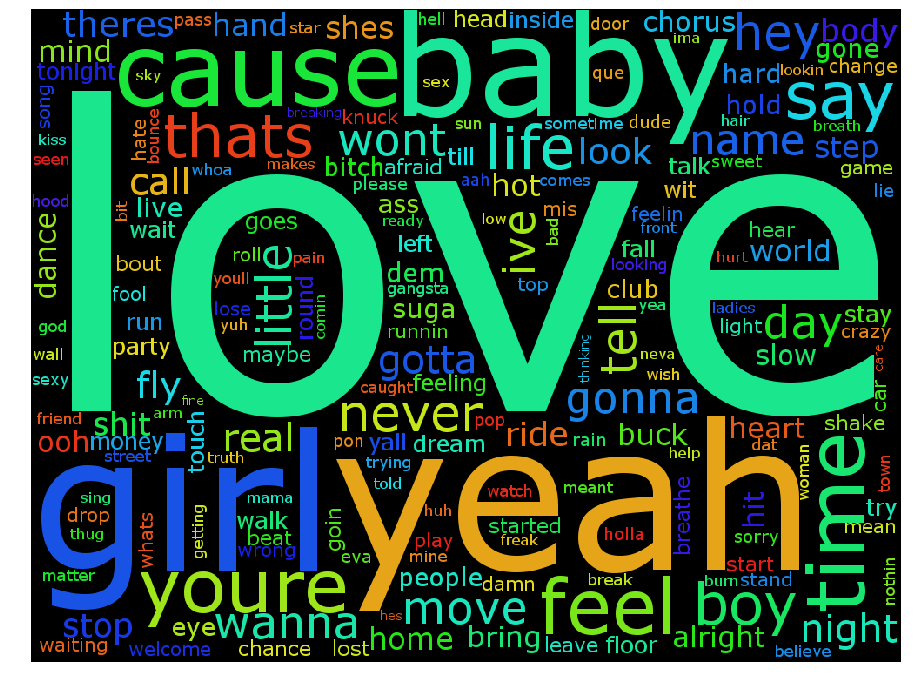

0 811667
1 127004
2 126965
3 126965
4 59456
59456


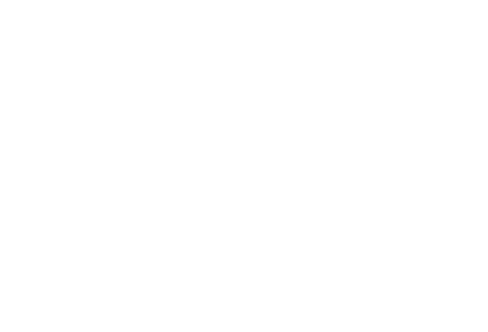

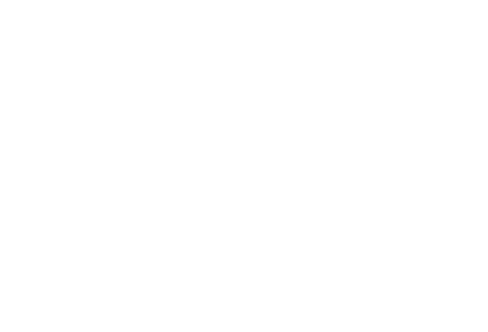

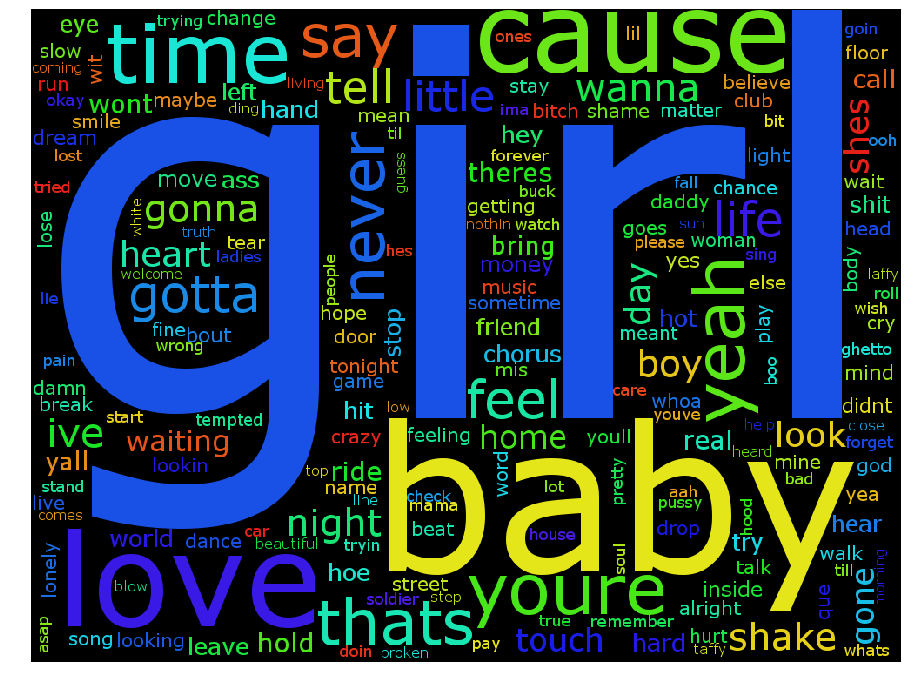

0 866974
1 135135
2 135108
3 135108
4 64037
64037


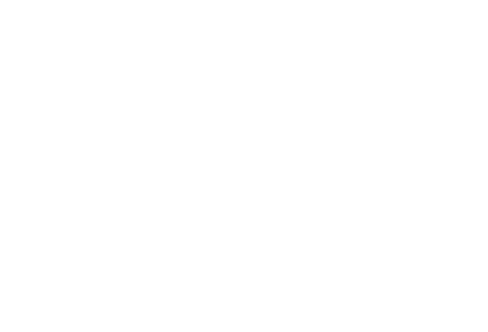

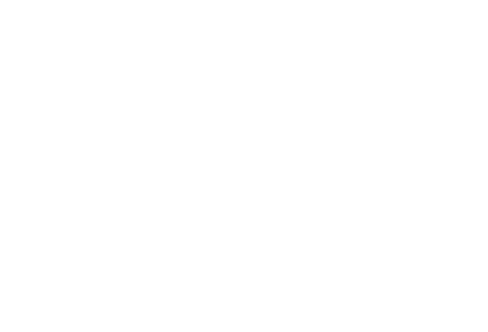

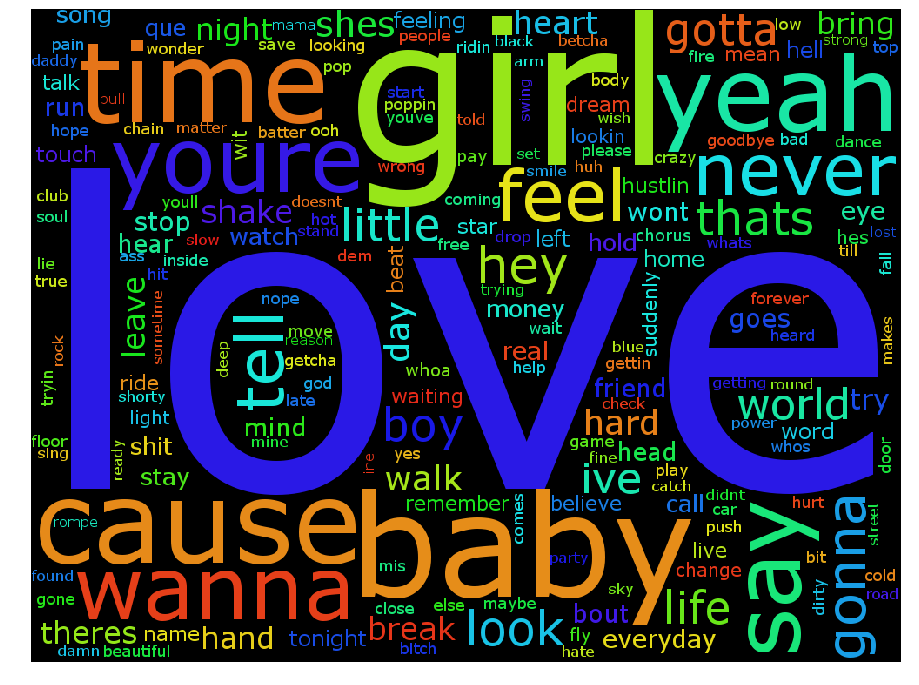

0 835130
1 131400
2 131369
3 131369
4 60937
60937


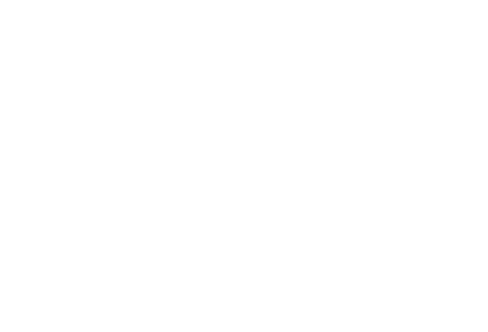

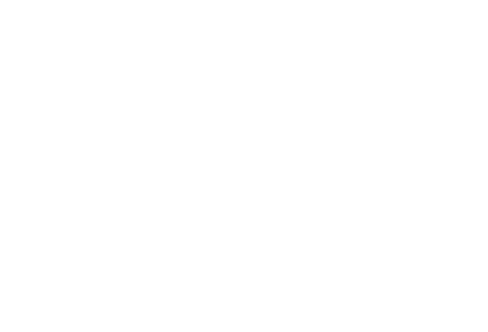

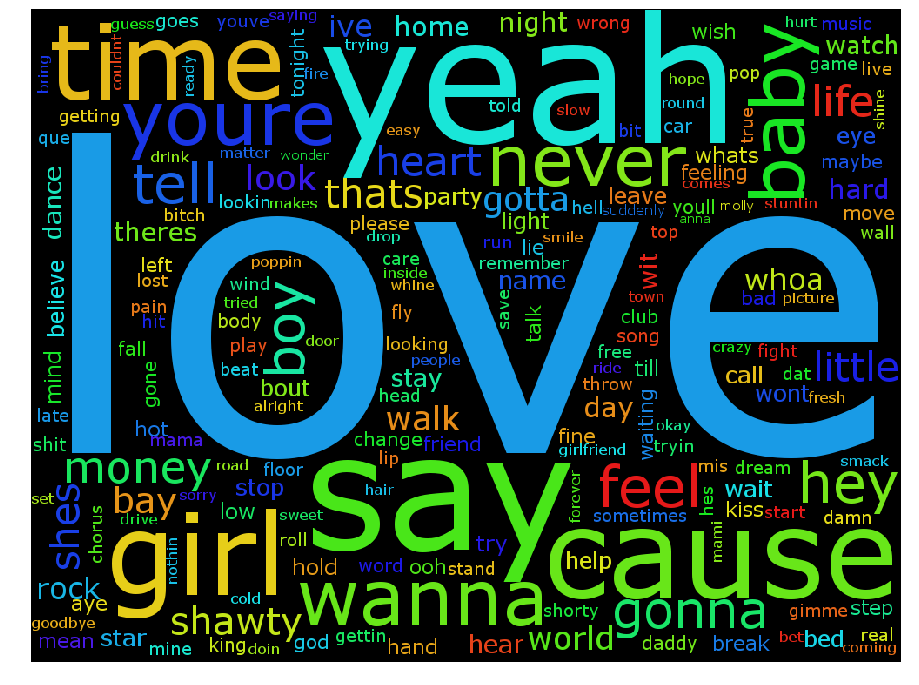

0 876774
1 138246
2 138219
3 138219
4 63548
63548


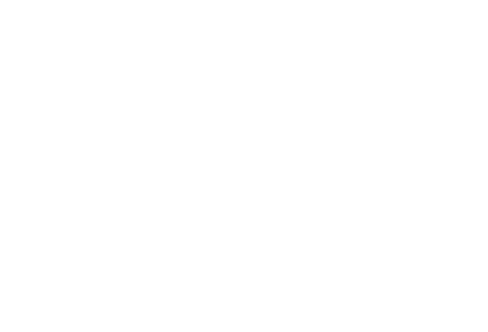

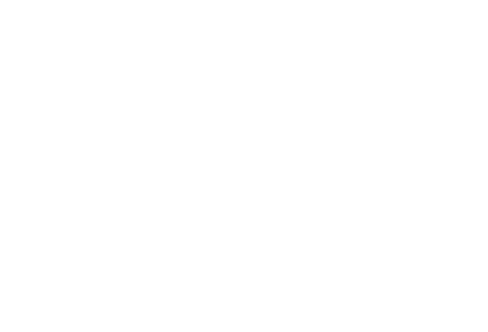

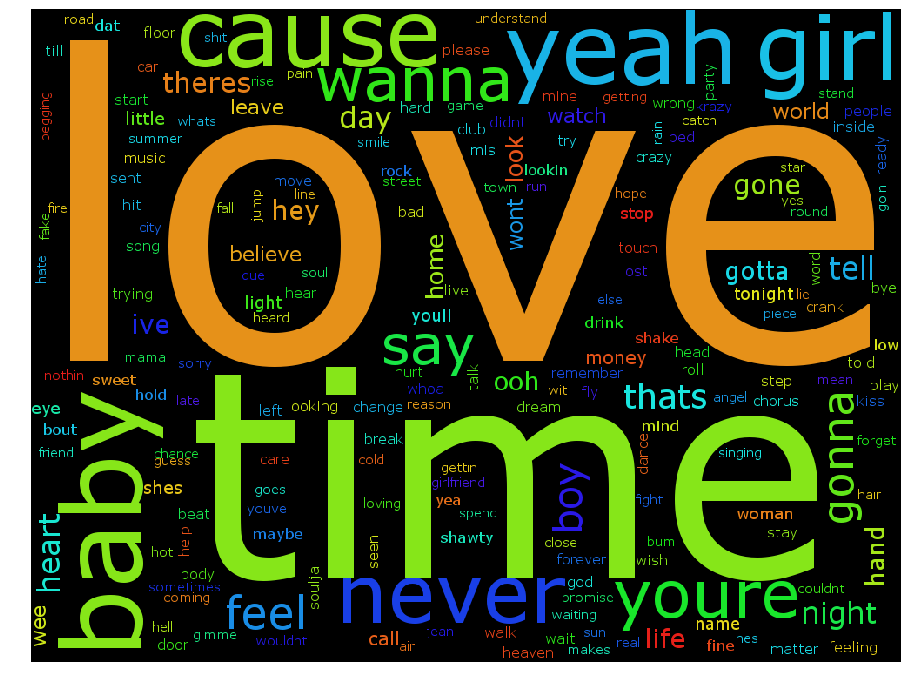

0 969613
1 151788
2 151751
3 151751
4 69502
69502


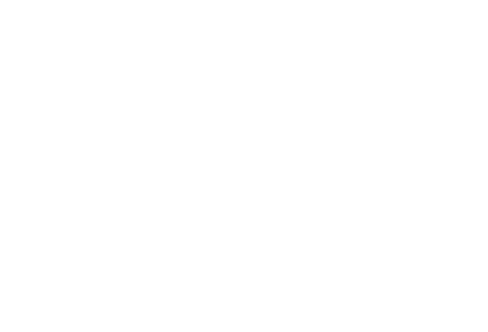

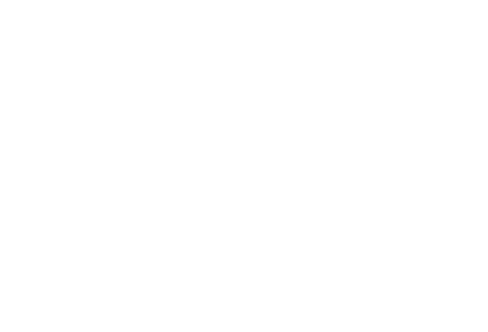

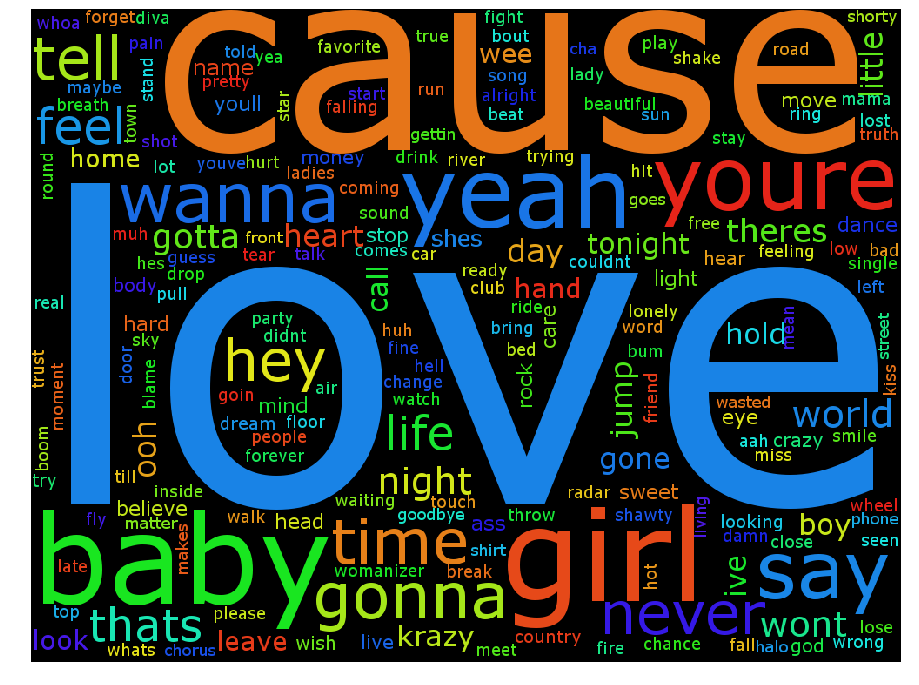

0 1074473
1 167478
2 167432
3 167432
4 80397
80397


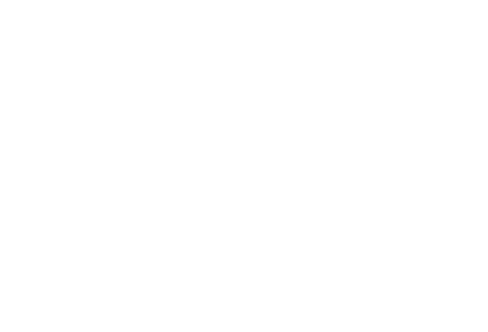

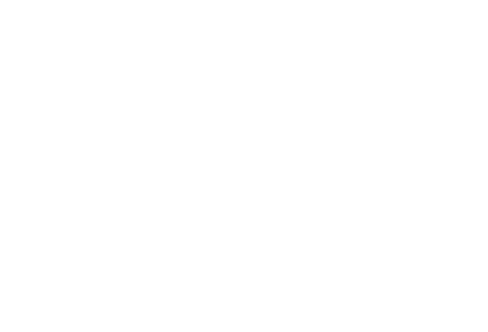

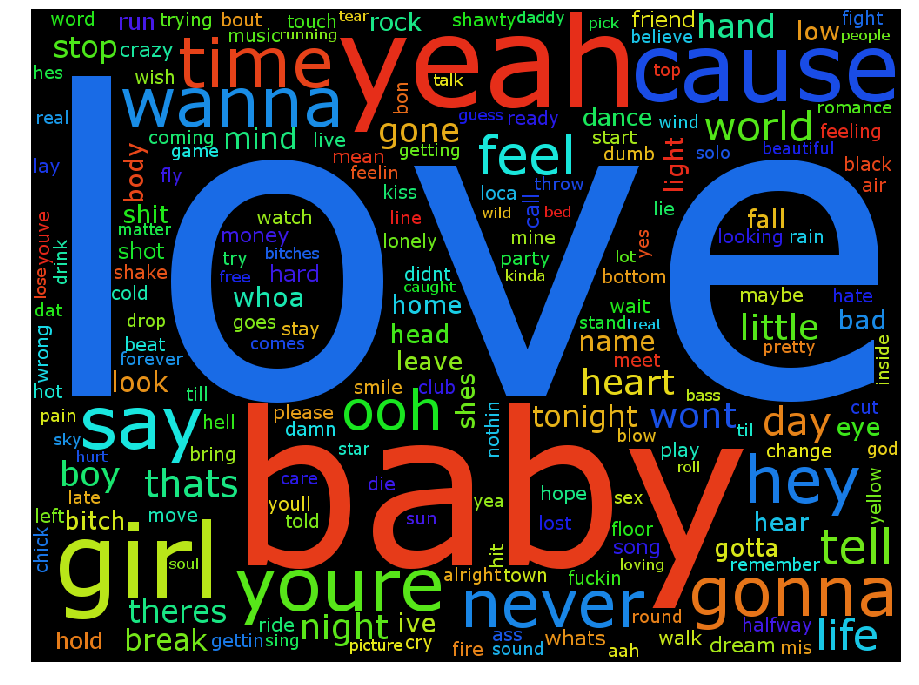

0 1102617
1 172590
2 172577
3 172577
4 82710
82710


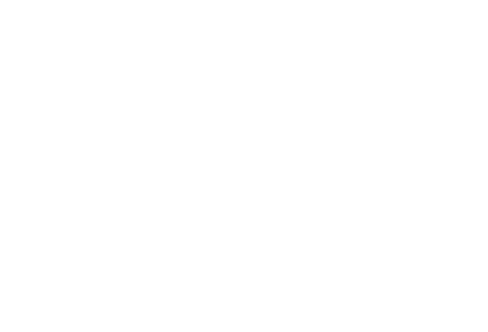

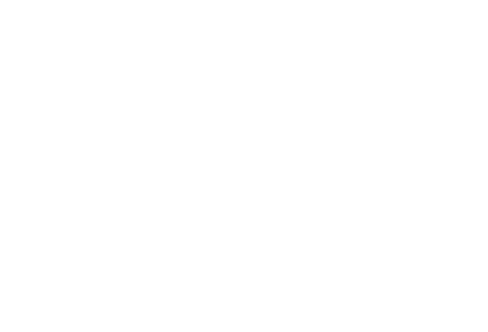

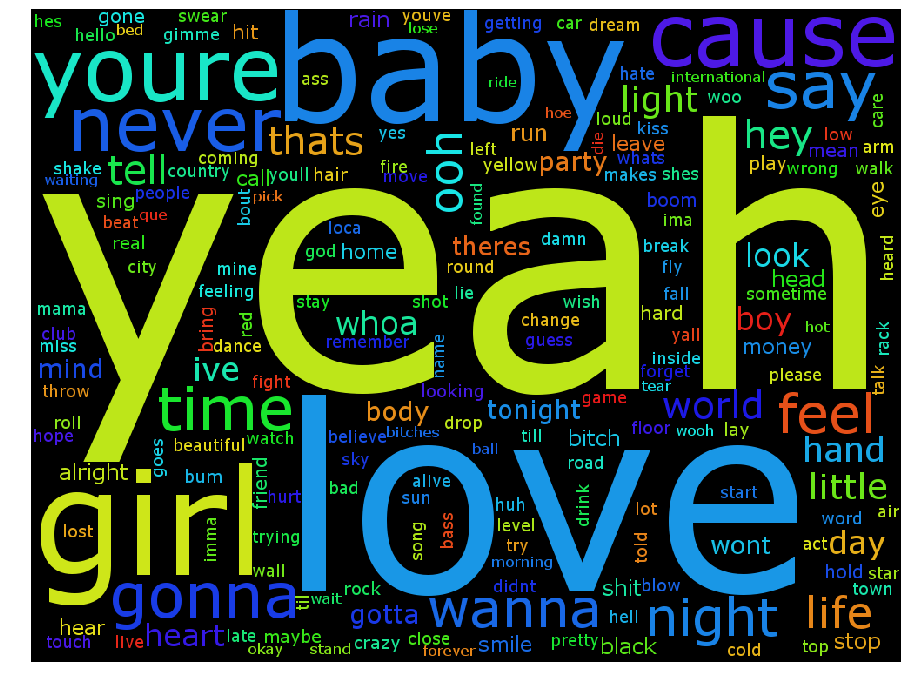

0 849997
1 133612
2 133594
3 133594
4 64172
64172


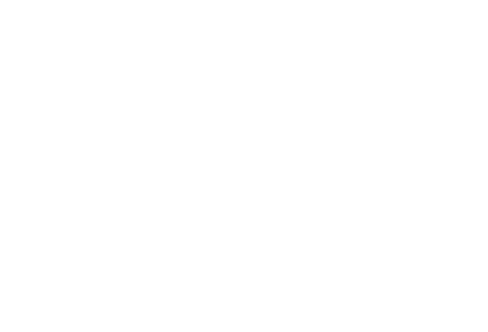

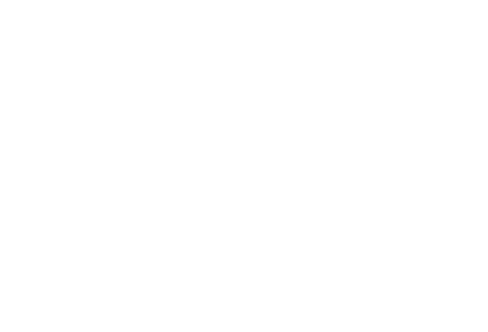

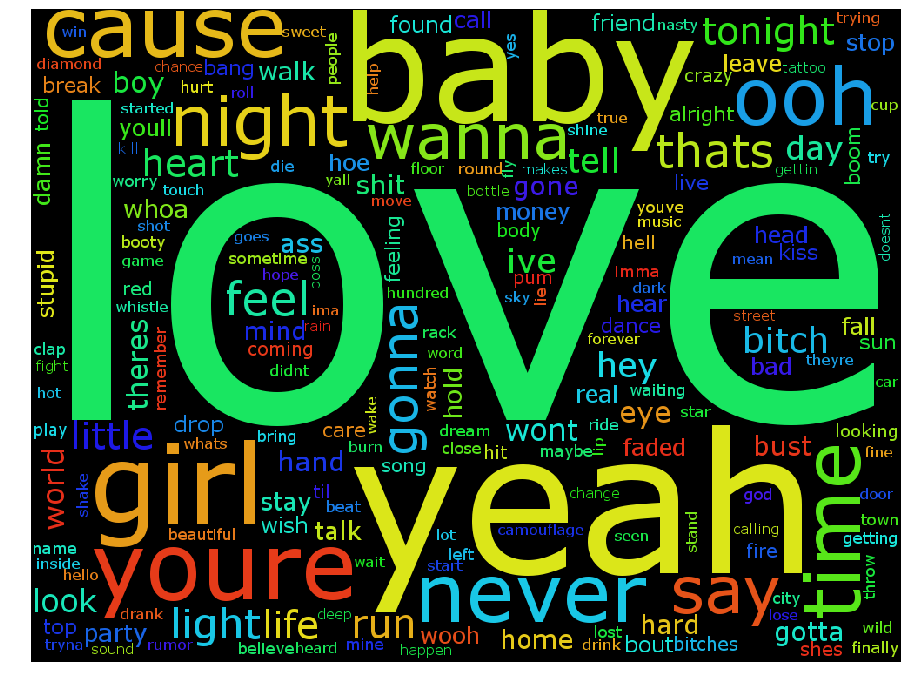

0 901784
1 141203
2 141124
3 141124
4 67581
67581


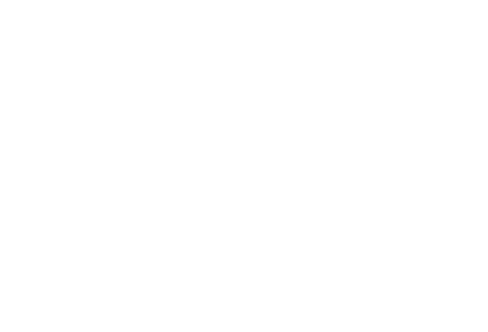

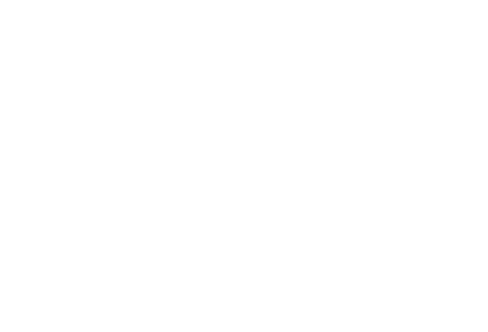

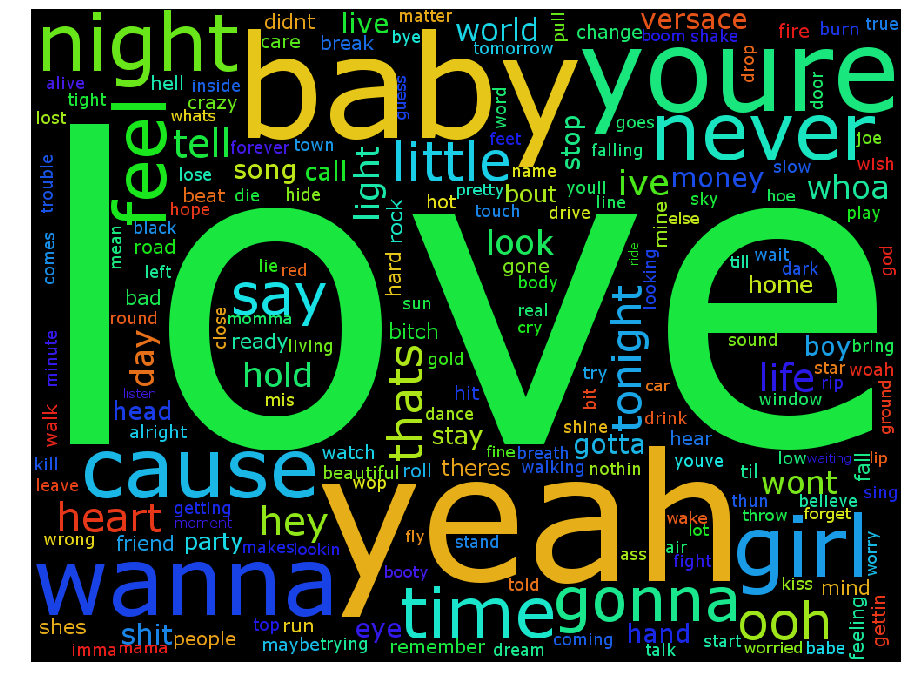

0 851239
1 133601
2 133539
3 133539
4 63443
63443


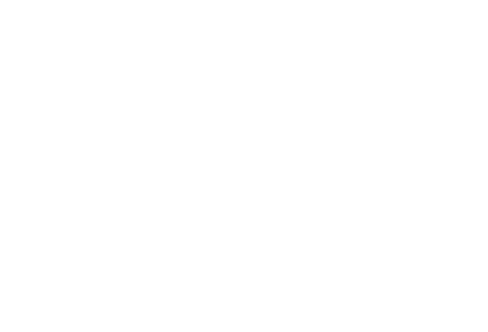

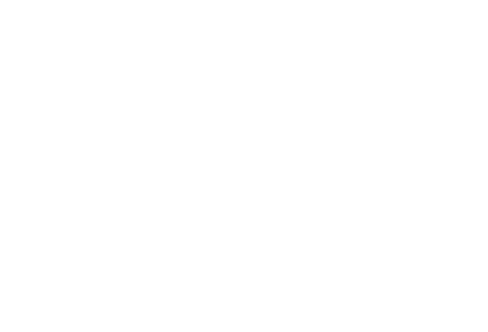

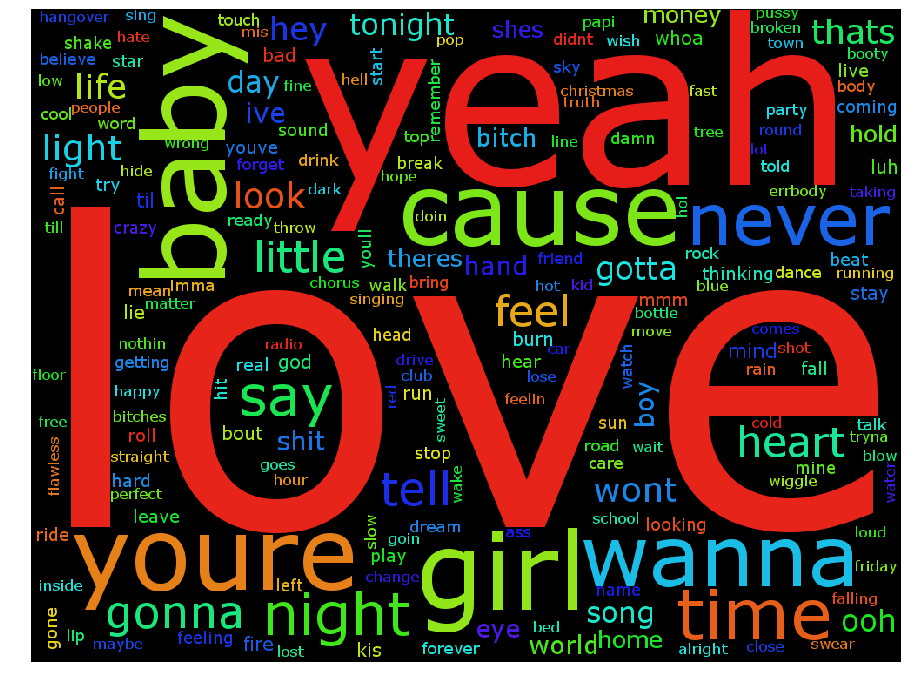

0 924306
1 144331
2 144236
3 144236
4 67085
67085


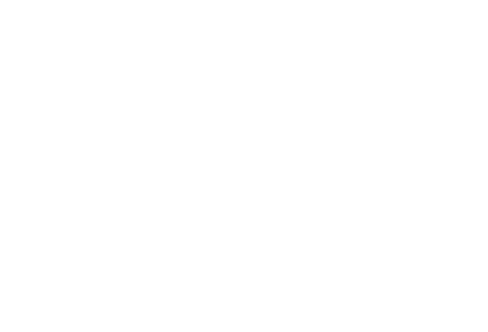

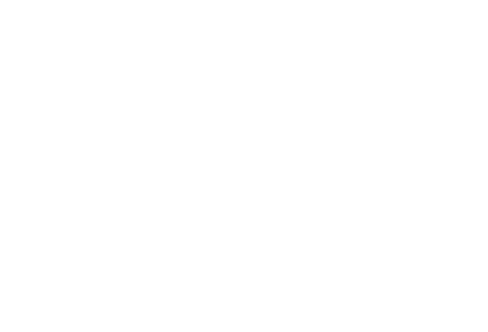

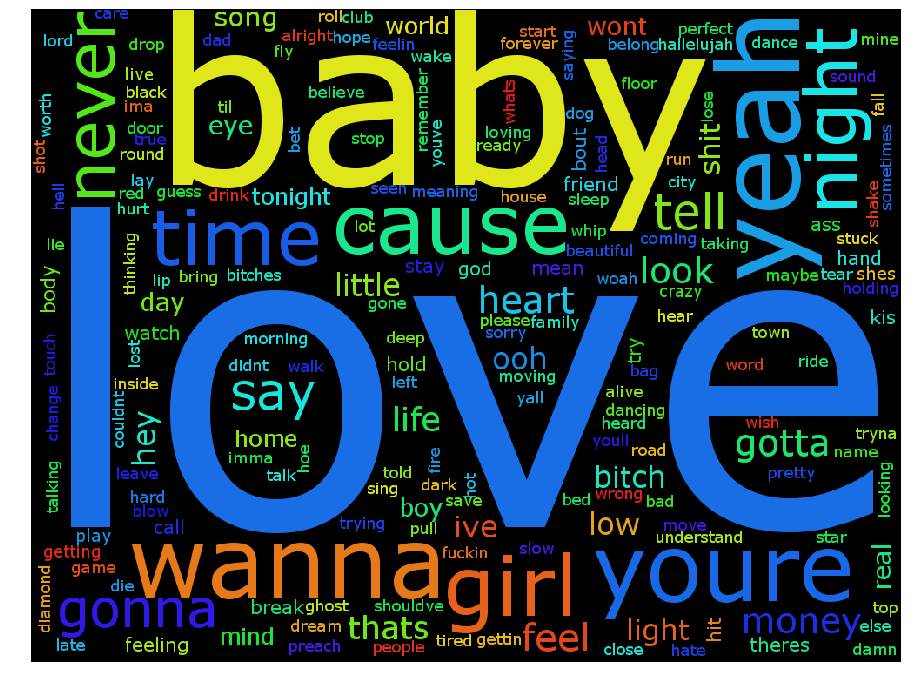

0 1023628
1 159789
2 159708
3 159708
4 75284
75284


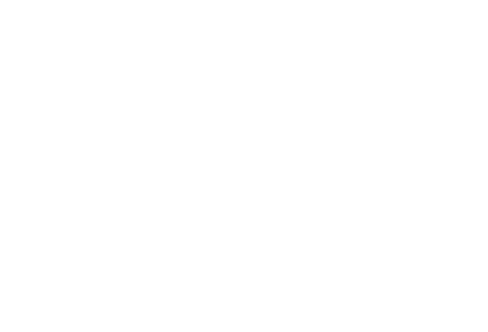

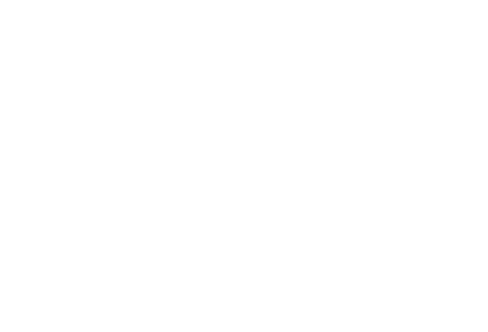

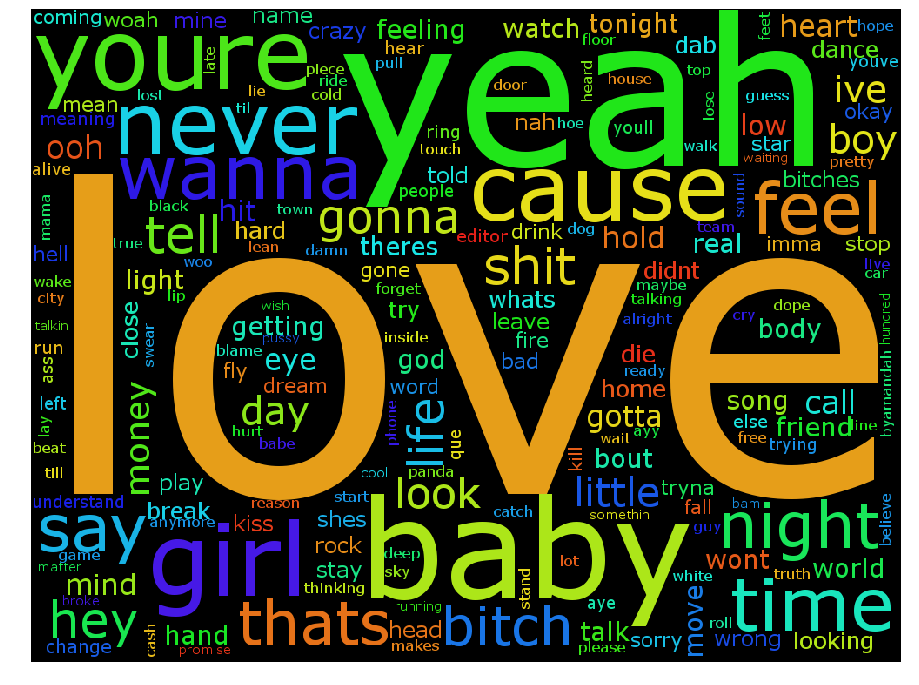

0 281556
1 44200
2 44176
3 44176
4 21189
21189


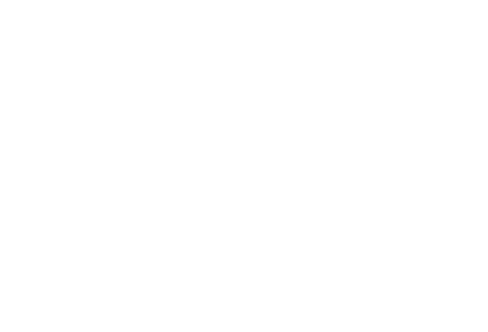

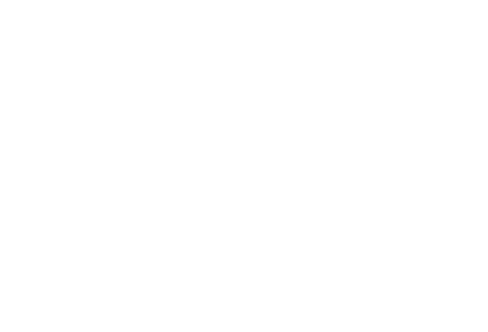

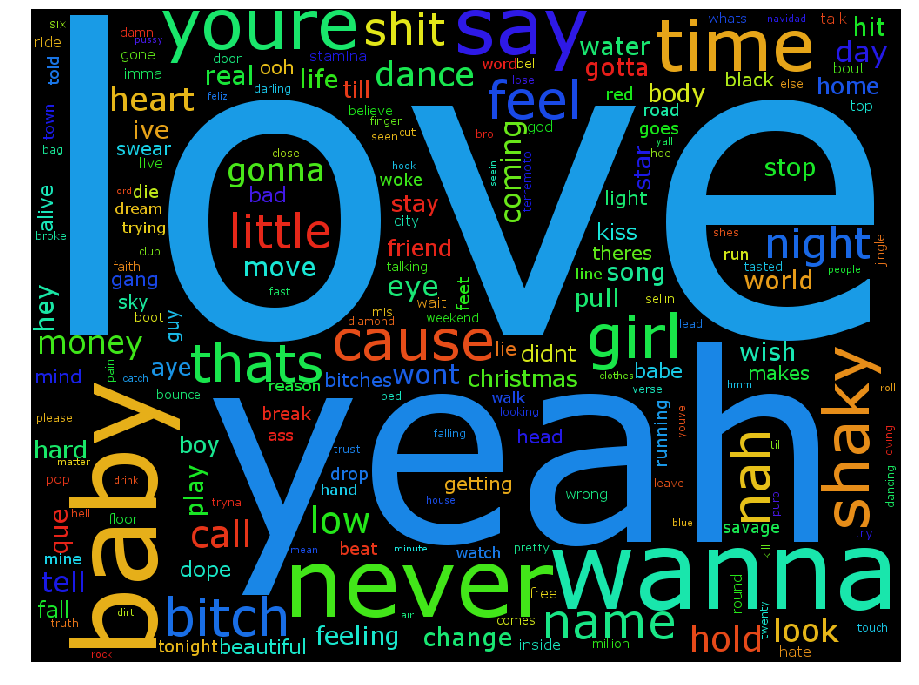

In [49]:
get_wordcloud_year('1987')
get_wordcloud_year('1988')
get_wordcloud_year('1989')
get_wordcloud_year('1990')
get_wordcloud_year('1991')
get_wordcloud_year('1992')
get_wordcloud_year('1993')
get_wordcloud_year('1994')
get_wordcloud_year('1995')
get_wordcloud_year('1996')
get_wordcloud_year('1997')
get_wordcloud_year('1998')
get_wordcloud_year('1999')
get_wordcloud_year('2000')
get_wordcloud_year('2001')
get_wordcloud_year('2002')
get_wordcloud_year('2003')
get_wordcloud_year('2004')
get_wordcloud_year('2005')
get_wordcloud_year('2006')
get_wordcloud_year('2007')
get_wordcloud_year('2008')
get_wordcloud_year('2009')
get_wordcloud_year('2010')
get_wordcloud_year('2011')
get_wordcloud_year('2012')
get_wordcloud_year('2013')
get_wordcloud_year('2014')
get_wordcloud_year('2015')
get_wordcloud_year('2016')
get_wordcloud_year('2017')



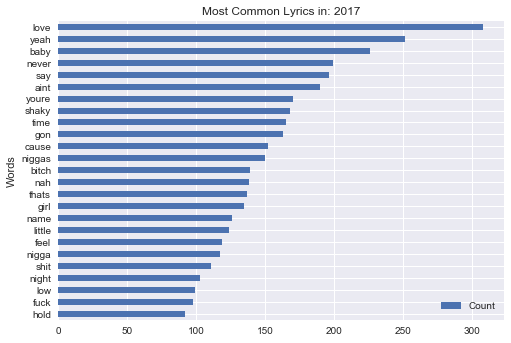

In [42]:
h = get_wordfreq_df('2017')

In [ ]:
sns.jointplot(x = "Words", y = int("Count"), data=l);

In [6]:
words1988 = words_by_year('1988')
words1989 = words_by_year('1989')
words1990 = words_by_year('1990')
words1991 = words_by_year('1991')
words1992 = words_by_year('1992')
words1993 = words_by_year('1993')
words1994 = words_by_year('1994')
words1995 = words_by_year('1995')
words1996 = words_by_year('1996')
words1997 = words_by_year('1997')
words1998 = words_by_year('1998')
words1999 = words_by_year('1999')
words2000 = words_by_year('2000')
words2001 = words_by_year('2001')
words2002 = words_by_year('2002')
words2003 = words_by_year('2003')
words2004 = words_by_year('2004')
words2005 = words_by_year('2005')
words2006 = words_by_year('2006')
words2007 = words_by_year('2007')
words2008 = words_by_year('2008')
words2009 = words_by_year('2009')
words2010 = words_by_year('2010')
words2011 = words_by_year('2011')
words2012 = words_by_year('2012')
words2013 = words_by_year('2013')
words2014 = words_by_year('2014')
words2015 = words_by_year('2015')
words2016 = words_by_year('2016')
words2017 = words_by_year('2017')

In [7]:
from sklearn.feature_extraction.text import CountVectorizer

vocab = ' '.join(df_lyric['lyric'])#['The swimmer likes swimming so he swims.']
vec = CountVectorizer(analyzer=u'word',stop_words="english").fit([vocab])

sentence1 = vec.transform([words1988])
sentence2 = vec.transform([words1989])
sentence3 = vec.transform([words1990])
sentence4 = vec.transform([words1991])
sentence5 = vec.transform([words1992])
sentence6 = vec.transform([words1993])
sentence7 = vec.transform([words1994])
sentence8 = vec.transform([words1995])
sentence9 = vec.transform([words1996])
sentence10 = vec.transform([words1997])
sentence11 = vec.transform([words1998])
sentence12 = vec.transform([words1999])
sentence13 = vec.transform([words2000])
sentence14 = vec.transform([words2001])
sentence15 = vec.transform([words2002])
sentence16 = vec.transform([words2003])
sentence17 = vec.transform([words2004])
sentence18 = vec.transform([words2005])
sentence19 = vec.transform([words2006])
sentence20 = vec.transform([words2007])
sentence21 = vec.transform([words2008])
sentence22 = vec.transform([words2009])
sentence23 = vec.transform([words2010])
sentence24 = vec.transform([words2011])
sentence25 = vec.transform([words2012])
sentence26 = vec.transform([words2013])
sentence27 = vec.transform([words2014])
sentence28 = vec.transform([words2015])
sentence29 = vec.transform([words2016])
sentence30 = vec.transform([words2017])

#print('Vocabulary: %s' %vec.get_feature_names())
print('Sentence 1: %s' %sentence1.toarray())
print('Sentence 2: %s' %sentence2.toarray())
print('Sentence 3: %s' %sentence3.toarray())
print('Sentence 4: %s' %sentence4.toarray())
print('Sentence 5: %s' %sentence5.toarray())

df1 = pd.DataFrame()
df1['Words'] = vec.get_feature_names()
# df1['1988'] = sentence1
# df1['1989'] = sentence2
# df1['1990'] = sentence3
# df1['1991'] = sentence4
# df1['1992'] = sentence5
df1['1988'] = sentence1.toarray()[0]
df1['1989'] = sentence2.toarray()[0]
df1['1990'] = sentence3.toarray()[0]
df1['1991'] = sentence4.toarray()[0]
df1['1992'] = sentence5.toarray()[0]
df1['1993'] = sentence6.toarray()[0]
df1['1994'] = sentence7.toarray()[0]
df1['1995'] = sentence8.toarray()[0]
df1['1996'] = sentence9.toarray()[0]
df1['1997'] = sentence10.toarray()[0]
df1['1998'] = sentence11.toarray()[0]
df1['1999'] = sentence12.toarray()[0]
df1['2000'] = sentence13.toarray()[0]
df1['2001'] = sentence14.toarray()[0]
df1['2002'] = sentence15.toarray()[0]
df1['2003'] = sentence16.toarray()[0]
df1['2004'] = sentence17.toarray()[0]
df1['2005'] = sentence18.toarray()[0]
df1['2006'] = sentence19.toarray()[0]
df1['2007'] = sentence20.toarray()[0]
df1['2008'] = sentence21.toarray()[0]
df1['2009'] = sentence22.toarray()[0]
df1['2010'] = sentence23.toarray()[0]
df1['2011'] = sentence24.toarray()[0]
df1['2012'] = sentence25.toarray()[0]
df1['2013'] = sentence26.toarray()[0]
df1['2014'] = sentence27.toarray()[0]
df1['2015'] = sentence28.toarray()[0]
df1['2016'] = sentence29.toarray()[0]
df1['2017'] = sentence30.toarray()[0]

#sns.kdeplot('Words', data=df1, fit_reg=False)

Sentence 1: [[0 0 0 ..., 0 0 0]]
Sentence 2: [[0 0 0 ..., 0 0 0]]
Sentence 3: [[0 0 0 ..., 0 0 0]]
Sentence 4: [[0 0 0 ..., 0 0 0]]
Sentence 5: [[0 0 0 ..., 0 0 0]]


In [8]:
top20 = df1.sum(axis=1).nlargest(n=25).index

In [9]:
dftop20 = df1.iloc[top20]

In [10]:
dftop20

Words  1988  1989  1990  1991  1992  1993  1994  1995  1996  ...   \
14364     im  1124  1226   989  1123  1348  1445  1331  1174  1143  ...    
16933   love  2201  1714  1514  1437  2086  1506  1408  1295  1015  ...    
8730    dont  1175  1225  1122   953  1079  1062  1030   932  1017  ...    
16524   like   723   648   660   568   624  1061   909   908   895  ...    
15850   know  1047  1074   982  1108  1016   999   983   901   755  ...    
19773     oh  1110  1293  1074   872   536   499   673   661   632  ...    
15490   just   932   914   920   943  1040   857   696   737   736  ...    
12362    got   592   729   731   554   732   615   643   624   752  ...    
1977    baby   862   952   973  1099  1007   761   718   719   769  ...    
32058   yeah   560   556   700   614   749   611   410   489   492  ...    
31043   want   904   715   632   598   832   677   779   770   918  ...    
32191  youre   544   545   701   815   625   324   397   488   443  ...    
4851   cause   340   355   308   486   496   558   552   466   508  ...    
17269   make   463   449   535   424   452   455   365   308   427  ...    
28910   time   641   422   566   678   575   400   544   526   491  ...    
16374    let   483   404   526   500   428   464   458   389   390  ...    
12102   girl   324   474   440   292   267   420   341   298   308  ...    
24568    say   493   366   370   403   370   390   421   388   458  ...    
31176    way   437   403   508   494   528   445   414   453   547  ...    
5992    come   379   467   517   544   355   467   485   438   353  ...    
14332    ill   344   391   424   708   826   551   743   401   355  ...    
846     aint   275   217   183   266   342   247   338   302   414  ...    
23750  right   318   306   277   296   411   308   301   268   278  ...    
12303  gonna   482   346   348   396   375   491   385   201   241  ...    
19152   need   337   366   369   385   425   272   329   314   251  ...    

       2008  2009  2010  2011  2012  2013  2014  2015  2016  2017  
14364  2110  2699  2996  3081  1994  2064  1882  2578  2611   710  
16933  1049  1250  1542  1361  1208  1250  1277  1442  1234   308  
8730   1199  1525  1596  1449  1441  1501  1502  1714  1822   600  
16524  1468  1630  1911  2246  1632  1619  1532  1772  1827   422  
15850  1242  1619  1245  1287  1165  1368  1289  1477  1728   513  
19773  1261  1858  1992  2904  1778  2263  1690  1627  2124   611  
15490  1177  1244  1363  1430  1076  1266  1107  1160  1269   336  
12362   982  1013   998  1203   938  1134  1073  1516  1420   375  
1977    750   919  1433  1084   964   895   843   956   979   226  
32058   737   867  1196  1624  1265  1112   945   858  1130   251  
31043   483   701   709   613   451   620   403   649   651   224  
32191   657   777   720   948   654   850   752   705   700   170  
4851    695   965   920   938   629   662   732   631   698   152  
17269   547   657   599   801   694   622   643   636   537   177  
28910   729   510   608   621   536   506   449   522   534   165  
16374   521   539   748   860   615   651   610   474   696   209  
12102   566   841   804   893   645   626   618   493   582   135  
24568   561   712   716   718   484   470   487   506   511   196  
31176   492   548   683   563   297   419   337   396   714   127  
5992    401   501   677   703   448   395   368   426   444   151  
14332   450   614   498   484   431   542   386   432   360   119  
846     450   534   631   682   519   538   646   872   915   190  
23750   506   648   595   749   556   647   416   411   458   137  
12303   447   583   657   688   425   501   396   520   367    88  
19152   390   422   464   390   390   341   318   533   715   174  

[25 rows x 31 columns]

TypeError: unsupported operand type(s) for /: 'unicode' and 'float'

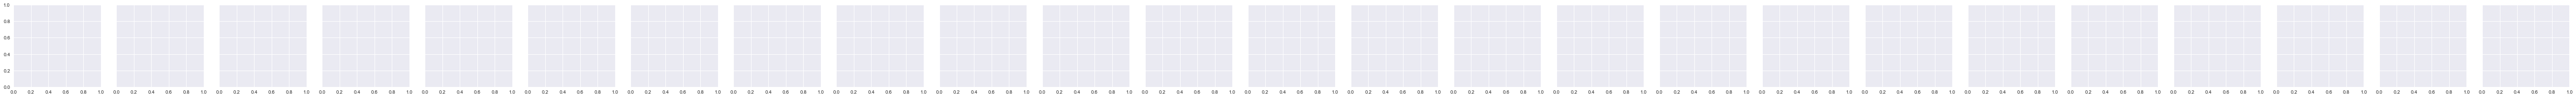

In [12]:
g = sns.FacetGrid(dftop20, col="Words")  
g.map(sns.distplot, "Words")  

In [ ]:
top20

In [ ]:
sns.plot(kind=barh, df1.iloc[top20], x ="Words")

In [ ]:
df1.iloc[top20]

In [ ]:
print Song(title='we-built-this-city', artist='starship',).lyrics.format()

In [11]:
"""
Minimal Example
===============
Generating a square wordcloud from the US constitution using default arguments.
"""
def wcloud_y(year):

    from os import path
    from wordcloud import WordCloud
    # Read the whole text.
    #text = open(path.join(d, 'constitution.txt')).read()

    # Generate a word cloud image
#    a = words_by_year(year)

    wordcloud = WordCloud().generate(vocab)

    # Display the generated image:
    # the matplotlib way:
    import matplotlib.pyplot as plt
    plt.imshow(wordcloud)
    plt.axis("off")

    # lower max_font_size
    wordcloud = WordCloud(max_font_size=30).generate(vocab)
    plt.figure()
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

# The pil way (if you don't have matplotlib)
#image = wordcloud.to_image()
#image.show()

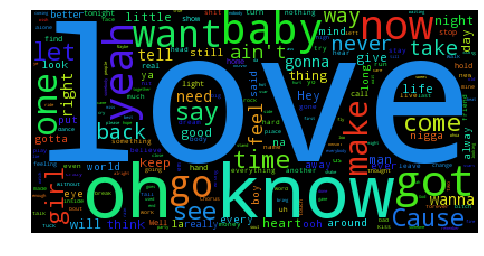

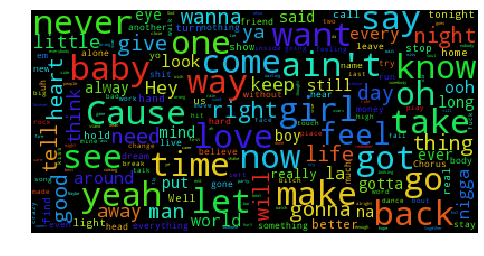

In [12]:
wcloud_y(1988)

<WordListCorpusReader in u'/Users/scottedenbaum/nltk_data/corpora/stopwords'>
